# *Merged Jupyter Notebook*

### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import re
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

## Data Collection

## 3.2 
### Define the data sources, parameters and quantity of raw datasets (0.4 point) 

In [2]:
# Loading the dataset
data = pd.read_csv('crime_dataset.csv')

In [3]:
# Displaying information about the Dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7926429 entries, 0 to 7926428
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2), float64(7), int64(3), object(1

### Collect necessary and sufficient raw datasets; Show samples from raw datasets. (0.1 point)

In [4]:
data.head(5)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11037294,JA371270,03/18/2015 12:00:00 PM,0000X W WACKER DR,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,BANK,False,False,...,42.0,32.0,11,NaN,NaN,2015,08/01/2017 03:52:26 PM,NaN,NaN,NaN
1,11646293,JC213749,12/20/2018 03:00:00 PM,023XX N LOCKWOOD AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,...,36.0,19.0,11,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,15.0,63.0,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,11645959,JC211511,12/20/2018 04:00:00 PM,045XX N ALBANY AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,...,33.0,14.0,08A,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
4,11645601,JC212935,06/01/2014 12:01:00 AM,087XX S SANGAMON ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,21.0,71.0,11,NaN,NaN,2014,04/06/2019 04:04:43 PM,NaN,NaN,NaN


In [5]:
data.sample(5)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
7458441,11508368,JB517219,11/14/2018 06:00:00 PM,030XX N Southport Ave,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,32.0,6.0,11,NaN,NaN,2018,11/21/2018 04:14:47 PM,NaN,NaN,NaN
2136615,1428950,G151176,03/15/2001 06:00:00 PM,005XX W CORNELIA AV,0560,ASSAULT,SIMPLE,RESIDENCE,False,True,...,NaN,NaN,08A,1171891.0,1923756.0,2001,09/07/2021 03:41:02 PM,41.946244,-87.643583,"(41.946243567, -87.643583496)"
5404657,8161188,HT395984,07/13/2011 11:23:00 PM,103XX S ABERDEEN ST,1812,NARCOTICS,POSS: CANNABIS MORE THAN 30GMS,STREET,True,False,...,34.0,73.0,18,1170807.0,1836426.0,2011,02/10/2018 03:50:01 PM,41.706626,-87.650121,"(41.70662559, -87.650120579)"
1749207,6289962,HP364384,05/30/2008 04:00:00 AM,082XX S DR MARTIN LUTHER KING JR DR,0915,MOTOR VEHICLE THEFT,"TRUCK, BUS, MOTOR HOME",STREET,False,False,...,6.0,44.0,07,1180335.0,1850445.0,2008,02/28/2018 03:56:25 PM,41.744883,-87.614801,"(41.744882725, -87.614801011)"
3160553,2614009,HJ217187,03/03/2003 07:00:00 PM,022XX N SEDGWICK ST,0313,ROBBERY,ARMED: OTHER DANGEROUS WEAPON,SIDEWALK,False,False,...,43.0,7.0,03,1173223.0,1915036.0,2003,02/10/2018 03:50:01 PM,41.922286,-87.638947,"(41.922286039, -87.638947142)"


### EDA before pre-processing the data

### 1. Crime type frequencies and Top 10 Crime types

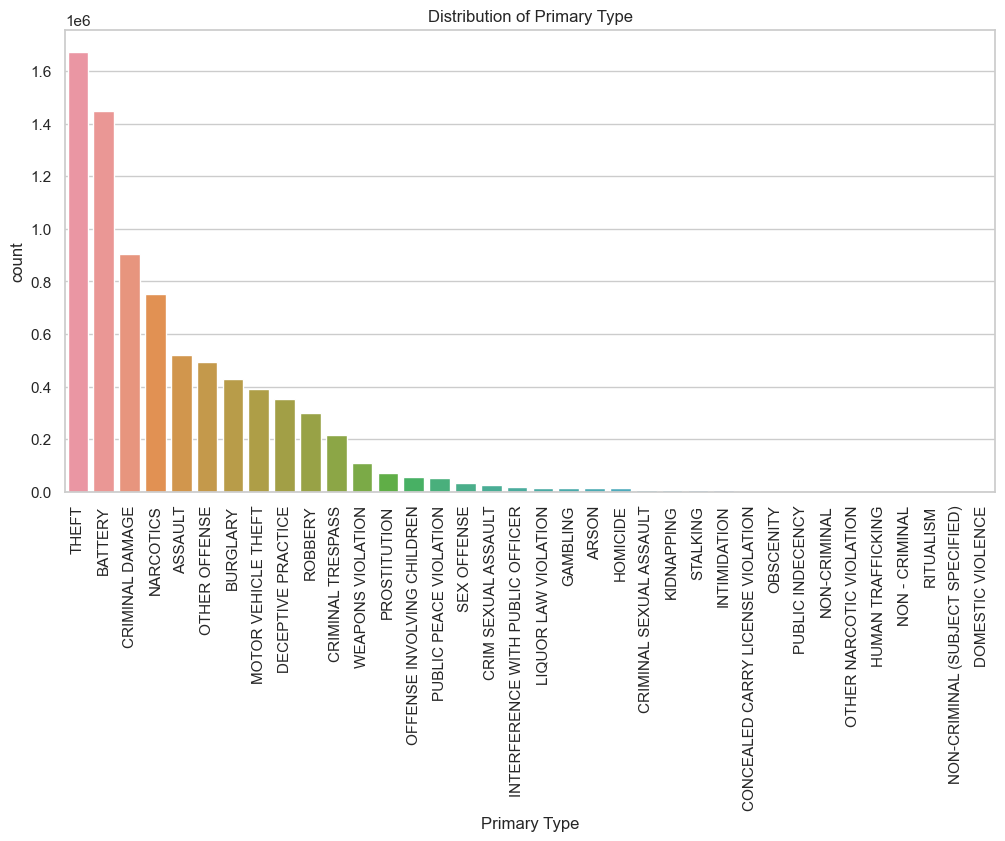

Top 10 Primary Types:
Index(['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'ASSAULT',
       'OTHER OFFENSE', 'BURGLARY', 'MOTOR VEHICLE THEFT',
       'DECEPTIVE PRACTICE', 'ROBBERY'],
      dtype='object')


In [6]:
# Import necessary libraries for EDA
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for plots
sns.set(style="whitegrid")

# Visualize the distribution of the target variable "Primary Type"
plt.figure(figsize=(12, 6))
sns.countplot(x='Primary Type', data=data, order=data['Primary Type'].value_counts().index)
plt.title('Distribution of Primary Type')
plt.xticks(rotation=90)
plt.show()

# Print the top 10 Primary Types
top_primary_types = data['Primary Type'].value_counts().nlargest(10).index
print("Top 10 Primary Types:")
print(top_primary_types)

## Data Pre-processing

## 3.3

### Pre-process collected raw data with cleaning and validation tools;  (0.4 point) 

#### 1. Checking the Missing values

In [7]:
# Checking for missing values
print("Missing values:\n", data.isnull().sum())

Missing values:
 ID                           0
Case Number                  0
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description     11981
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614853
Community Area          613477
FBI Code                     0
X Coordinate             90298
Y Coordinate             90298
Year                         0
Updated On                   0
Latitude                 90298
Longitude                90298
Location                 90298
dtype: int64


#### 2. Handling missing values

###  do count plot if possible

#### Imputing the missing values using mean and mode for numerical and categorical columns respectively

In [8]:
num_cols = data.select_dtypes(include=np.number).columns
imputer = SimpleImputer(strategy='mean')
data[num_cols] = imputer.fit_transform(data[num_cols])

cat_cols = data.select_dtypes(include='object').columns
imputer = SimpleImputer(strategy='most_frequent')
data[cat_cols] = imputer.fit_transform(data[cat_cols])


In [9]:
# Checking for missing values after imputing
print("Missing values:\n", data.isnull().sum())


Missing values:
 ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64


#### 3.Checking for Duplicate values

In [10]:
# Checking for duplicate rows
print("Duplicate rows:", data.duplicated().sum())

# Dropping duplicate rows (if necessary)
data = data.drop_duplicates()

Duplicate rows: 0


#### 4. Printing Basic Statistics

In [11]:
# Displaying basic statistics of the numerical columns
print("Basic Statistics:\n", data.describe())

Basic Statistics:
                  ID          Beat      District          Ward  Community Area  \
count  7.926429e+06  7.926429e+06  7.926429e+06  7.926429e+06    7.926429e+06   
mean   7.135345e+06  1.185397e+03  1.129546e+01  2.276081e+01    3.745963e+01   
std    3.564939e+06  7.033249e+02  6.955598e+00  1.330463e+01    2.069237e+01   
min    6.340000e+02  1.110000e+02  1.000000e+00  1.000000e+00    0.000000e+00   
25%    3.844933e+06  6.210000e+02  6.000000e+00  1.100000e+01    2.400000e+01   
50%    7.134231e+06  1.034000e+03  1.000000e+01  2.276081e+01    3.745963e+01   
75%    1.031053e+07  1.731000e+03  1.700000e+01  3.200000e+01    5.300000e+01   
max    1.326376e+07  2.535000e+03  3.100000e+01  5.000000e+01    7.700000e+01   

       X Coordinate  Y Coordinate          Year      Latitude     Longitude  
count  7.926429e+06  7.926429e+06  7.926429e+06  7.926429e+06  7.926429e+06  
mean   1.164614e+06  1.885812e+06  2.010177e+03  4.184226e+01 -8.767145e+01  
std    1.674623e+

#### 5.Printing unique values in categorical columns

In [12]:
# Displaying unique values in categorical columns
for column in data.select_dtypes(include=['object']).columns:
    print(f"Unique values in {column}:", data[column].unique())

Unique values in Case Number: ['JA371270' 'JC213749' 'JC212333' ... 'JD311791' 'JD340297' 'JD177406']
Unique values in Date: ['03/18/2015 12:00:00 PM' '12/20/2018 03:00:00 PM'
 '05/01/2016 12:25:00 AM' ... '05/06/2020 09:51:00 AM'
 '09/14/2020 06:13:00 PM' '07/27/2020 03:02:00 PM']
Unique values in Block: ['0000X W WACKER DR' '023XX N LOCKWOOD AVE' '055XX S ROCKWELL ST' ...
 '012XX W Montana St' '037XX S Union Ave' '014XX N Sandburg TER']
Unique values in IUCR: ['1153' '1154' '2820' '0810' '0820' '0460' '051A' '0430' '0890' '1195'
 '143A' '1130' '1120' '3730' '1563' '0486' '0420' '1140' '2825' '0860'
 '0620' '2024' '0560' '2027' '2250' '2014' '0281' '0454' '141A' '0910'
 '1310' '1320' '5000' '1150' '0498' '041A' '1220' '1206' '1156' '1210'
 '5002' '1811' '4387' '0610' '1155' '2826' '1110' '1152' '0496' '1751'
 '1122' '1752' '1780' '0520' '0265' '0440' '1121' '1754' '1477' '0930'
 '1330' '1345' '0340' '1822' '0320' '0497' '031A' '0530' '0870' '502P'
 '1710' '502R' '1365' '1261' '3710' '

Unique values in Location Description: ['BANK' 'APARTMENT' 'STREET' 'RESIDENCE' 'OTHER'
 'RESIDENCE - PORCH / HALLWAY' 'RESTAURANT' 'HOTEL/MOTEL' 'BAR OR TAVERN'
 'SIDEWALK' 'ATHLETIC CLUB' 'RESIDENCE PORCH/HALLWAY' 'SMALL RETAIL STORE'
 'POLICE FACILITY/VEH PARKING LOT' 'TAVERN/LIQUOR STORE'
 'VEHICLE NON-COMMERCIAL' 'OTHER (SPECIFY)' 'HOSPITAL BUILDING / GROUNDS'
 'CHA APARTMENT' 'DRIVEWAY - RESIDENTIAL'
 'PARKING LOT / GARAGE (NON RESIDENTIAL)' 'COMMERCIAL / BUSINESS OFFICE'
 'DEPARTMENT STORE' 'LIBRARY' 'GROCERY FOOD STORE'
 'NURSING HOME/RETIREMENT HOME' 'RESIDENCE-GARAGE' 'GAS STATION'
 'DRUG STORE' 'PARKING LOT/GARAGE(NON.RESID.)' 'CTA TRAIN' 'WAREHOUSE'
 'CONSTRUCTION SITE' 'MEDICAL / DENTAL OFFICE'
 'ATM (AUTOMATIC TELLER MACHINE)' 'RESIDENTIAL YARD (FRONT/BACK)'
 'CONVENIENCE STORE' 'CHA PARKING LOT / GROUNDS' 'HOTEL / MOTEL'
 'HOSPITAL BUILDING/GROUNDS' 'MEDICAL/DENTAL OFFICE' 'RESIDENCE - GARAGE'
 'ALLEY' 'NURSING / RETIREMENT HOME' 'PARK PROPERTY'
 'RESIDENCE - YARD (FRONT

#### Some sample of data

In [13]:
# Displaying samples from the pre-processed dataset
print("Samples from the pre-processed dataset:\n", data.sample(5))

Samples from the pre-processed dataset:
                 ID Case Number                    Date  \
4080644  3835285.0    HL207557  02/28/2005 10:20:00 AM   
4197749  3976341.0    HL334684  05/04/2005 12:13:12 PM   
6427189  9820732.0    HX470166  10/11/2014 09:30:00 PM   
1241169  5218217.0    HM801679  12/30/2006 10:00:00 AM   
6131743  9298045.0    HW443264  09/07/2013 11:30:00 PM   

                                       Block  IUCR   Primary Type  \
4080644                   025XX W MEDILL AVE  0610       BURGLARY   
4197749                     032XX W 111TH ST  0860          THEFT   
6427189  047XX S DR MARTIN LUTHER KING JR DR  2825  OTHER OFFENSE   
1241169                  067XX N WESTERN AVE  0820          THEFT   
6131743                      053XX W 53RD PL  0486        BATTERY   

                     Description Location Description  Arrest  Domestic  ...  \
4080644           FORCIBLE ENTRY            RESIDENCE   False     False  ...   
4197749             RETAIL THEFT   

### Performing EDA  after pre-processing to analyze the data more

### 1. Crime type frequencies and Top 10 Crime types

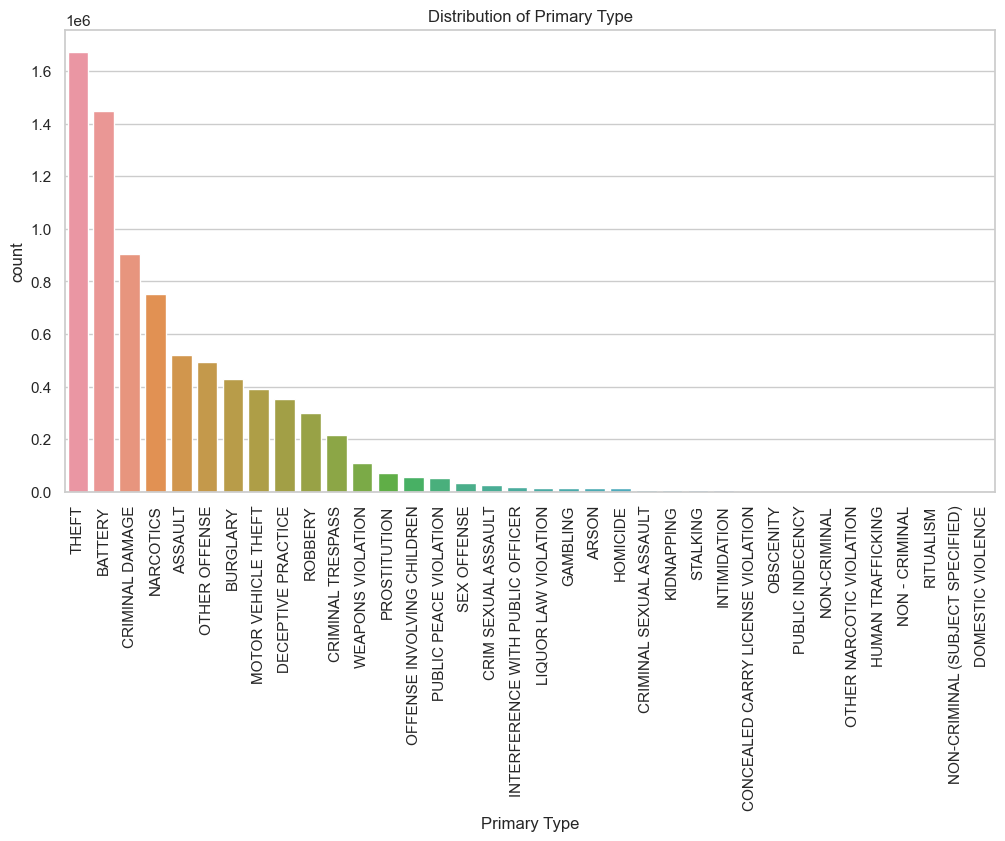

Top 10 Primary Types:
Index(['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'ASSAULT',
       'OTHER OFFENSE', 'BURGLARY', 'MOTOR VEHICLE THEFT',
       'DECEPTIVE PRACTICE', 'ROBBERY'],
      dtype='object')


In [14]:
# Import necessary libraries for EDA
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for plots
sns.set(style="whitegrid")

# Visualize the distribution of the target variable "Primary Type"
plt.figure(figsize=(12, 6))
sns.countplot(x='Primary Type', data=data, order=data['Primary Type'].value_counts().index)
plt.title('Distribution of Primary Type')
plt.xticks(rotation=90)
plt.show()

# Print the top 10 Primary Types
top_primary_types = data['Primary Type'].value_counts().nlargest(10).index
print("Top 10 Primary Types:")
print(top_primary_types)

### 2. Top 10 Community areas where the crime is majorly happening

<Figure size 1500x800 with 0 Axes>

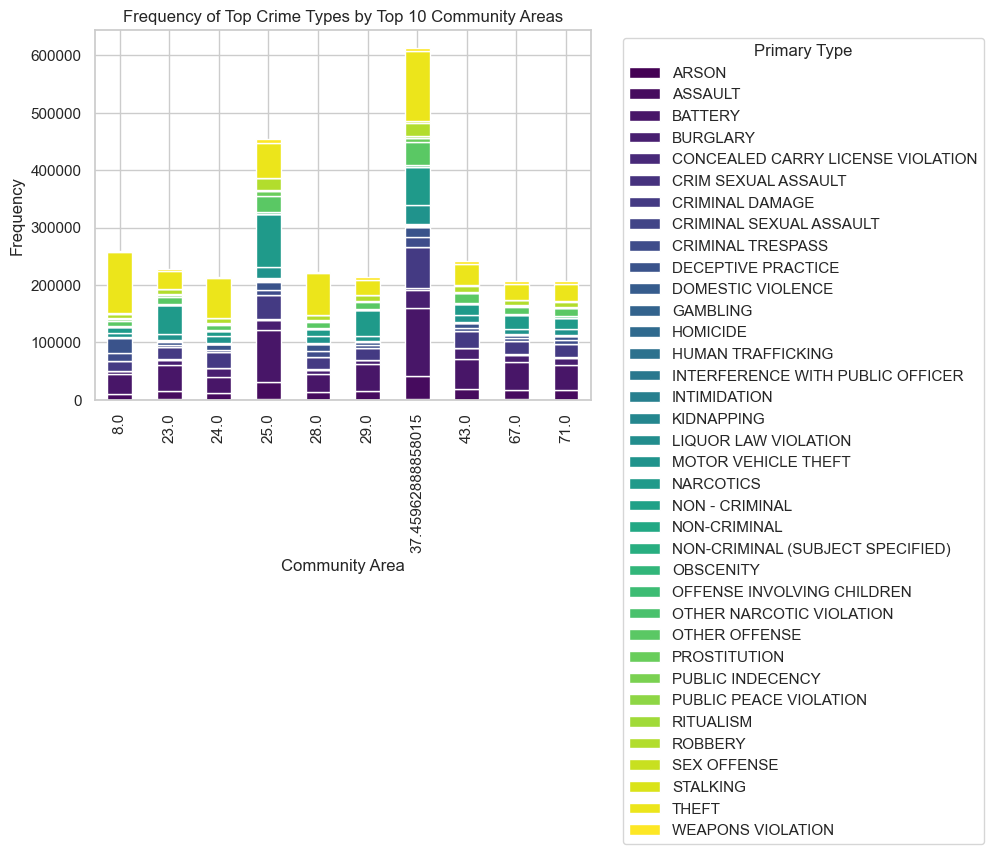

In [15]:
import matplotlib.pyplot as plt

# Select the top N community areas with the highest crime frequency
top_community_areas = data['Community Area'].value_counts().nlargest(10).index
data_top_community_areas = data[data['Community Area'].isin(top_community_areas)]

# Grouping data by 'Primary Type' and 'Community Area' and counting the frequency
crime_counts_by_community = data_top_community_areas.groupby(['Community Area', 'Primary Type']).size().unstack(fill_value=0)

# Plotting the bar chart
plt.figure(figsize=(15, 8))  # Provide both width and height values
crime_counts_by_community.plot(kind='bar', stacked=True, colormap='viridis')

# Setting x and y labels and title for the plot
plt.xlabel('Community Area')
plt.ylabel('Frequency')
plt.title('Frequency of Top Crime Types by Top 10 Community Areas')

# Customizing the legend
plt.legend(title='Primary Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### 3.Top 10 Crime types and top 10 location descriptions

<Figure size 1500x1500 with 0 Axes>

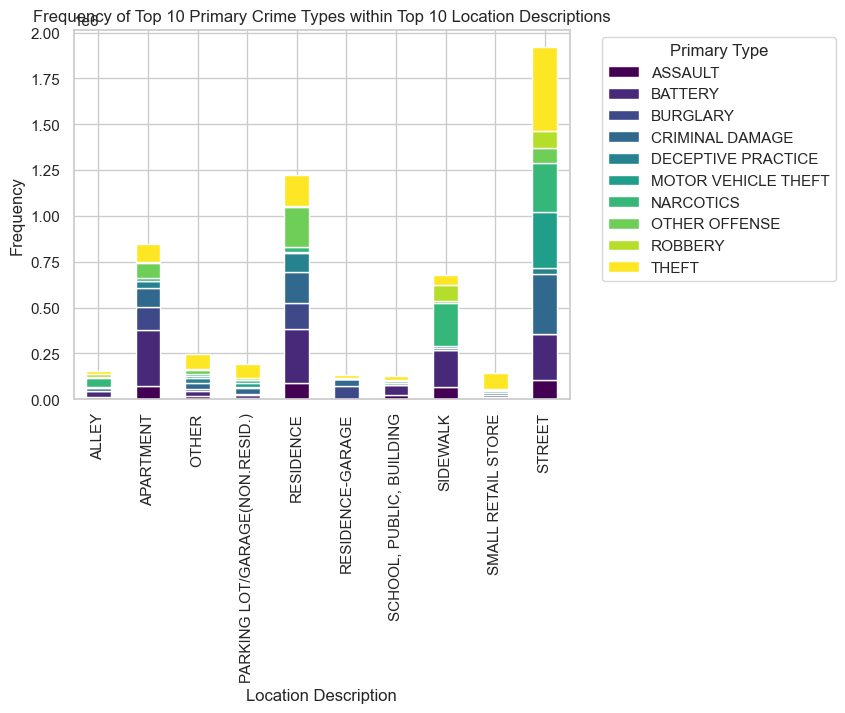

In [16]:
# Select the top N primary crime types and top N location descriptions
top_primary_types = data['Primary Type'].value_counts().nlargest(10).index
top_location_descriptions = data['Location Description'].value_counts().nlargest(10).index

data_top_primary_types_locations = data[data['Primary Type'].isin(top_primary_types) & data['Location Description'].isin(top_location_descriptions)]

# Grouping data by 'Location Description' and 'Primary Type' and counting the frequency
crime_counts_by_location = data_top_primary_types_locations.groupby(['Location Description', 'Primary Type']).size().unstack(fill_value=0)

# Plotting the bar chart
plt.figure(figsize=(15, 15))
crime_counts_by_location.plot(kind='bar', stacked=True, colormap='viridis')

# Setting x and y labels and title for the plot
plt.xlabel('Location Description')
plt.ylabel('Frequency')
plt.title('Frequency of Top 10 Primary Crime Types within Top 10 Location Descriptions')

# Customizing the legend
plt.legend(title='Primary Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


## Data Transformation

## 3.4

### Transform pre-processed datasets to desired formats , show the related tools , scripts or formulas, methods;  (0.4 point)

In [17]:
# Label encoding for categorical variables
label_encoder = LabelEncoder()
for col in cat_cols:
    data[col] = label_encoder.fit_transform(data[col])

In [18]:
data.head(5)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11037294.0,6397683,653292,1219,135,9,232,23,False,False,...,42.0,32.0,13,1.164614e+06,1.885812e+06,2015.0,3392,41.842264,-87.671447,830487
1,11646293.0,6844308,3188902,21623,136,9,231,17,False,False,...,36.0,19.0,13,1.164614e+06,1.885812e+06,2018.0,1501,41.842264,-87.671447,830487
2,11645836.0,6843484,1048858,44415,135,9,232,189,False,False,...,15.0,63.0,13,1.164614e+06,1.885812e+06,2016.0,1501,41.842264,-87.671447,830487
3,11645959.0,6843050,3188928,37627,315,26,470,160,False,False,...,33.0,14.0,9,1.164614e+06,1.885812e+06,2018.0,1501,41.842264,-87.671447,830487
4,11645601.0,6843826,1338751,57489,135,9,232,160,False,False,...,21.0,71.0,13,1.164614e+06,1.885812e+06,2014.0,1501,41.842264,-87.671447,830487


### EDA after Label Encoding

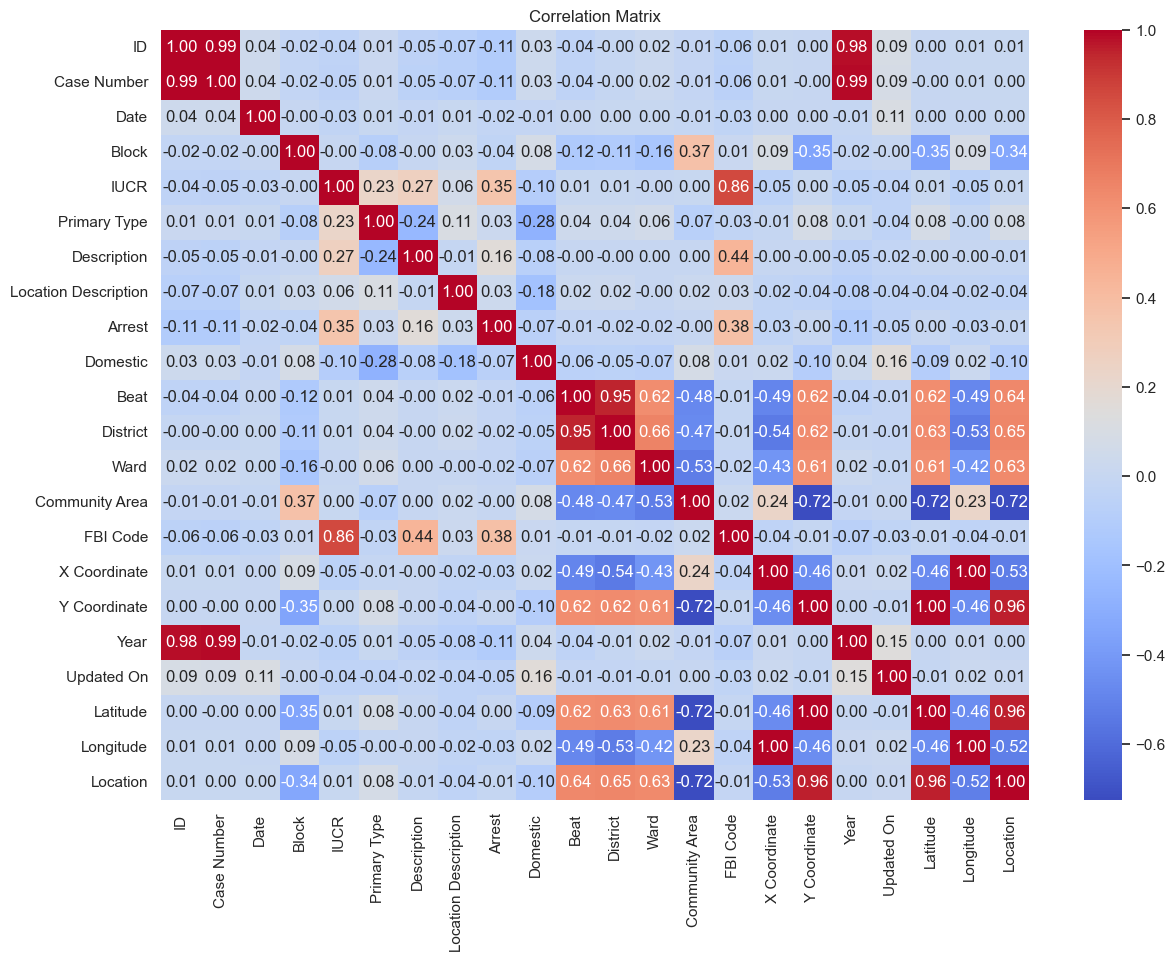

In [19]:
# Visualize the correlation matrix
corr_matrix = data.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## Feature Selection and Engineering

### Using Lasso Regression (L1 Regularization) and Domain knowledge for feature selection

In [20]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler

X = data.drop(['Primary Type'], axis=1)

# Target variable
y = data['Primary Type']

# Assuming 'X' and 'y' are your feature matrix and target variable
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply L1 regularization with cross-validated selection of the best alpha
lasso = LassoCV(cv=5)
lasso.fit(X_scaled, y)

# Get selected features with non-zero coefficients
selected_features = X.columns[lasso.coef_ != 0]

print("Selected Features:", selected_features)


Selected Features: Index(['ID', 'Date', 'Block', 'IUCR', 'Description', 'Location Description',
       'Domestic', 'District', 'Ward', 'FBI Code', 'Updated On', 'Longitude',
       'Location'],
      dtype='object')


In [21]:
# Loading the selected features based on Lasso Regression (L1 Regularization) and Domain knowledge into a new CSV file
selected_features = [
    'Date','Year','Longitude','Latitude','Location Description','Primary Type','Description'
]

data_selected = data[selected_features]

In [22]:
# Save the new CSV file as preprocessed_crimes_data.csv
data_selected.to_csv('preprocessed_crimes_data.csv', index=False)

In [23]:
# Load the preprocessed_crimes_data.csv file
data_selected = pd.read_csv('preprocessed_crimes_data.csv')

In [24]:
data_selected.head(10)

,Date,Year,Longitude,Latitude,Location Description,Primary Type,Description
0,653292,2015.0,-87.671447,41.842264,23,9,232
1,3188902,2018.0,-87.671447,41.842264,17,9,231
2,1048858,2016.0,-87.671447,41.842264,189,9,232
3,3188928,2018.0,-87.671447,41.842264,160,26,470
4,1338751,2014.0,-87.671447,41.842264,160,9,232
5,2223711,2018.0,-87.671447,41.842264,160,34,360
6,7618,2018.0,-87.671447,41.842264,160,9,232
7,778818,2018.0,-87.671447,41.842264,160,9,232
8,276626,2015.0,-87.671447,41.842264,140,9,232
9,1084232,2012.0,-87.671447,41.842264,189,9,232


In [25]:
# Renaming the 'Primary Type' column to 'Crime_Type'
data_selected.rename(columns={'Primary Type': 'Crime_Type'}, inplace=True)

In [26]:
data_selected.head(10)

,Date,Year,Longitude,Latitude,Location Description,Crime_Type,Description
0,653292,2015.0,-87.671447,41.842264,23,9,232
1,3188902,2018.0,-87.671447,41.842264,17,9,231
2,1048858,2016.0,-87.671447,41.842264,189,9,232
3,3188928,2018.0,-87.671447,41.842264,160,26,470
4,1338751,2014.0,-87.671447,41.842264,160,9,232
5,2223711,2018.0,-87.671447,41.842264,160,34,360
6,7618,2018.0,-87.671447,41.842264,160,9,232
7,778818,2018.0,-87.671447,41.842264,160,9,232
8,276626,2015.0,-87.671447,41.842264,140,9,232
9,1084232,2012.0,-87.671447,41.842264,189,9,232


In [27]:
# Checking for missing values after feature engineering
print("Missing values:\n", data_selected.isnull().sum())

Missing values:
 Date                    0
Year                    0
Longitude               0
Latitude                0
Location Description    0
Crime_Type              0
Description             0
dtype: int64


## Data Preparation

### 3.5

#### Preparing Training, Validation and testing datasets from Transformed dataset (preprocessed_crimes_data.csv)

## Model Development


### 1. Aritifical Neural Network (ANN) - Baseline

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
data_selected = pd.read_csv('/Users/sarahsha/Downloads/preprocessed_crimes_data.csv')

In [2]:
data_selected.head(5)

,Date,Year,Longitude,Latitude,Location Description,Primary Type,Description
0,653292,2015.0,-87.671447,41.842264,23,9,232
1,3188902,2018.0,-87.671447,41.842264,17,9,231
2,1048858,2016.0,-87.671447,41.842264,189,9,232
3,3188928,2018.0,-87.671447,41.842264,160,26,470
4,1338751,2014.0,-87.671447,41.842264,160,9,232


In [3]:
# Renaming the 'Primary Type' column to 'Crime_Type'
data_selected.rename(columns={'Primary Type': 'Crime_Type'},inplace = True)

In [5]:
data_selected

,Date,Year,Longitude,Latitude,Location Description,Crime_Type,Description
0,653292,2015.0,-87.671447,41.842264,23,9,232
1,3188902,2018.0,-87.671447,41.842264,17,9,231
2,1048858,2016.0,-87.671447,41.842264,189,9,232
3,3188928,2018.0,-87.671447,41.842264,160,26,470
4,1338751,2014.0,-87.671447,41.842264,160,9,232
...,...,...,...,...,...,...,...
7926424,2012451,2020.0,-87.698104,41.772671,17,3,502
7926425,1502240,2020.0,-87.614211,41.724546,160,34,1
7926426,1877568,2020.0,-87.709461,41.870921,17,2,211
7926427,2050563,2020.0,-87.688929,41.995927,189,18,152


In [6]:
X = data_selected.drop('Crime_Type', axis=1)
y = data_selected['Crime_Type']

In [7]:
# scale the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
from sklearn.model_selection import train_test_split
# Split the data into training and temporary (validation and testing) sets.
# X_train, X_temp, y_train, y_temp = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
# Split the remaining data into validation and testing sets.
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42)

In [9]:
from tensorflow.keras.utils import to_categorical
num_classes=len(y_train.unique())
y_train_onehot = to_categorical(y_train, num_classes)
y_val_onehot = to_categorical(y_val, num_classes)
y_test_onehot = to_categorical(y_test, num_classes)

2023-11-29 14:01:44.847236: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [11]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(num_classes, activation='softmax'))
#from tensorflow.keras.optimizers import Adam
# Compile the model
#optimizer = Adam(learning_rate=10) 
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_onehot, epochs=5, batch_size=32, validation_data=(X_val,y_val_onehot))

# Evaluate the model on the test set


2023-11-29 14:01:48.673601: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/5
173391/173391 [==============================] - 114s 656us/step - loss: 1.0319 - accuracy: 0.6786 - val_loss: 0.7835 - val_accuracy: 0.7340
Epoch 2/5
173391/173391 [==============================] - 115s 665us/step - loss: 0.7083 - accuracy: 0.7659 - val_loss: 0.6508 - val_accuracy: 0.7893
Epoch 3/5
173391/173391 [==============================] - 114s 658us/step - loss: 0.6250 - accuracy: 0.7925 - val_loss: 0.5969 - val_accuracy: 0.8041
Epoch 4/5
173391/173391 [==============================] - 115s 665us/step - loss: 0.5784 - accuracy: 0.8066 - val_loss: 0.5628 - val_accuracy: 0.8141
Epoch 5/5
173391/173391 [==============================] - 118s 678us/step - loss: 0.5530 - accuracy: 0.8133 - val_loss: 0.5462 - val_accuracy: 0.8137


In [12]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test_onehot)

24523/24523 [==============================] - 11s 443us/step - loss: 0.5473 - accuracy: 0.8130
Test Accuracy: 81.30%


In [16]:
# Predict the probabilities of instances belonging to each class.
y_pred_probabilities = model.predict(X_test)
# Make the final Prediction
y_pred = np.argmax(y_pred_probabilities,axis=-1)

24523/24523 [==============================] - 10s 392us/step


In [17]:
# Evaluate the performance
from sklearn.metrics import precision_score, recall_score, f1_score
Precision = precision_score(y_test, y_pred, average='weighted')
Recall = recall_score(y_test, y_pred, average='weighted')
F1_score = f1_score(y_test, y_pred, average='weighted')
print(f'Test Accuracy: {accuracy * 100:.2f}%')
print(f'One Hidden Layer ANN Precision: {Precision:.2f}' )
print(f'One Hidden Layer ANN Recall: {Recall:.2f}' )
print(f'One Hidden Layer ANN F1_score: {F1_score:.2f}' )

/Users/sarahsha/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Accuracy: 81.30%
One Hidden Layer ANN Precision: 0.79
One Hidden Layer ANN Recall: 0.81
One Hidden Layer ANN F1_score: 0.79


In [13]:
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

In [19]:
y_pred_probabilities = model.predict(X_test)

24523/24523 [==============================] - 10s 403us/step


In [20]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = np.argmax(y_pred_probabilities,axis=-1)
report = classification_report(y_test, y_pred)
print(f'One Hidden Layer Classification Report:\n'
      f'{report}')

/Users/sarahsha/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sarahsha/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


One Hidden Layer Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.10      0.17      1281
           1       0.46      0.09      0.15     51657
           2       0.71      0.95      0.82    143368
           3       0.87      0.93      0.90     42516
           4       0.71      0.23      0.35       103
           5       0.63      0.62      0.62      2775
           6       0.88      0.93      0.90     89570
           7       0.69      0.37      0.48       752
           8       0.70      0.63      0.66     21757
           9       0.69      0.62      0.66     34693
          11       0.77      0.61      0.68      1504
          12       0.37      0.17      0.23      1255
          13       0.00      0.00      0.00        10
          14       0.79      0.38      0.51      1860
          15       0.00      0.00      0.00       451
          16       0.00      0.00      0.00       719
          17       0.49      0.33      0.

/Users/sarahsha/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
from sklearn.metrics import precision_score, recall_score, f1_score

Precision = precision_score(y_test, y_pred, average='weighted')
Recall = recall_score(y_test, y_pred, average='weighted')
F1_score = f1_score(y_test, y_pred, average='weighted')

/Users/sarahsha/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
print(f'One Hidden Layer ANN Precision: {Precision:.2f}' )
print(f'One Hidden Layer ANN Recall: {Recall:.2f}' )
print(f'One Hidden Layer ANN F1_score: {F1_score:.2f}' )

One Hidden Layer ANN Precision: 0.79
One Hidden Layer ANN Recall: 0.81
One Hidden Layer ANN F1_score: 0.79


In [23]:
crime_type_mapping = {
    0: 'ARSON',
    1: 'ASSAULT',
    2: 'BATTERY',
    3: 'BURGLARY',
    4: 'CONCEALED CARRY LICENSE VIOLATION',
    5: 'CRIM SEXUAL ASSAULT',
    6: 'CRIMINAL DAMAGE',
    7: 'CRIMINAL SEXUAL ASSAULT',
    8: 'CRIMINAL TRESPASS',
    9: 'DECEPTIVE PRACTICE',
    10: 'DOMESTIC VIOLENCE',
    11: 'GAMBLING',
    12: 'HOMICIDE',
    13: 'HUMAN TRAFFICKING',
    14: 'INTERFERENCE WITH PUBLIC OFFICER',
    15: 'INTIMIDATION',
    16: 'KIDNAPPING',
    17: 'LIQUOR LAW VIOLATION',
    18: 'MOTOR VEHICLE THEFT',
    19: 'NARCOTICS',
    20: 'NON - CRIMINAL',
    21: 'NON-CRIMINAL',
    22: 'NON-CRIMINAL (SUBJECT SPECIFIED)',
    23: 'OBSCENITY',
    24: 'OFFENSE INVOLVING CHILDREN',
    25: 'OTHER NARCOTIC VIOLATION',
    26: 'OTHER OFFENSE',
    27: 'PROSTITUTION',
    28: 'PUBLIC INDECENCY',
    29: 'PUBLIC PEACE VIOLATION',
    30: 'RITUALISM',
    31: 'ROBBERY',
    32: 'SEX OFFENSE',
    33: 'STALKING',
    34: 'THEFT',
    35: 'WEAPONS VIOLATION'
}

In [24]:
y_test_pred = model.predict(X_test)

24523/24523 [==============================] - 9s 376us/step


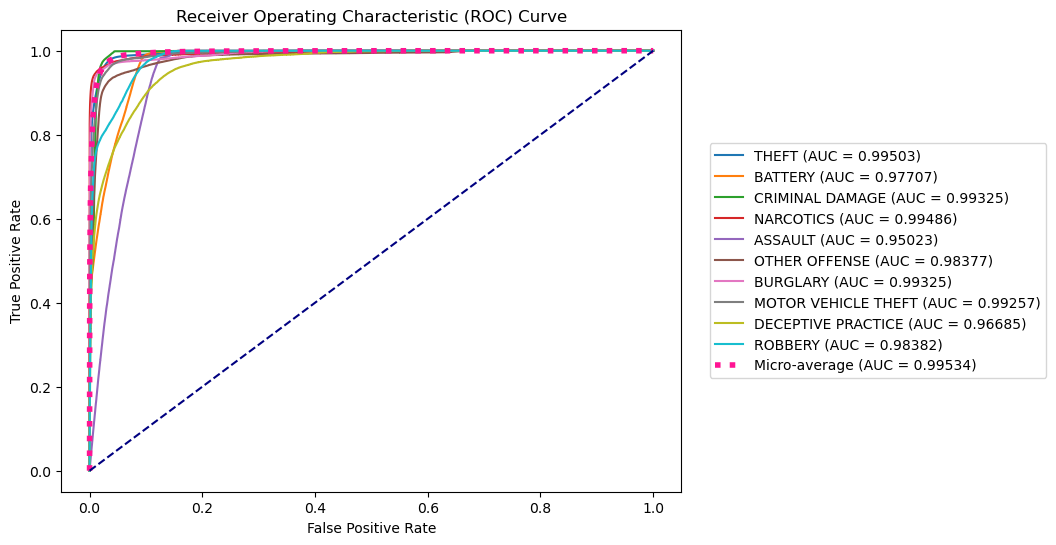

In [25]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import numpy as np


n_classes = y_test_onehot.shape[1] if len(y_test_onehot.shape) > 1 else 1

class_counts = np.sum(y_test_onehot, axis=0)
top_10_classes = np.argsort(class_counts)[-10:][::-1]
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    if i != 10:
        fpr[i], tpr[i], _ = roc_curve(y_test_onehot[:, i], y_test_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_onehot.ravel(),  y_test_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve
plt.figure(figsize=(8, 6))

# Plot individual class ROC curves
for i in top_10_classes:
    if i != 10:
        plt.plot(fpr[i], tpr[i], label=f'{crime_type_mapping[i]} (AUC = {roc_auc[i]:.5f})')

# Plot micro-average ROC curve
plt.plot(fpr["micro"], tpr["micro"],
         label='Micro-average (AUC = {0:0.5f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

# Plot random guessing
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='right', bbox_to_anchor=(1.6, 0.5))
plt.show()

# Calculate the overall ROC AUC score
#macro_roc_auc = roc_auc_score(y_test_onehot, y_test_pred, average='macro')
#print(f'Macro-average ROC AUC: {macro_roc_auc:.2f}')

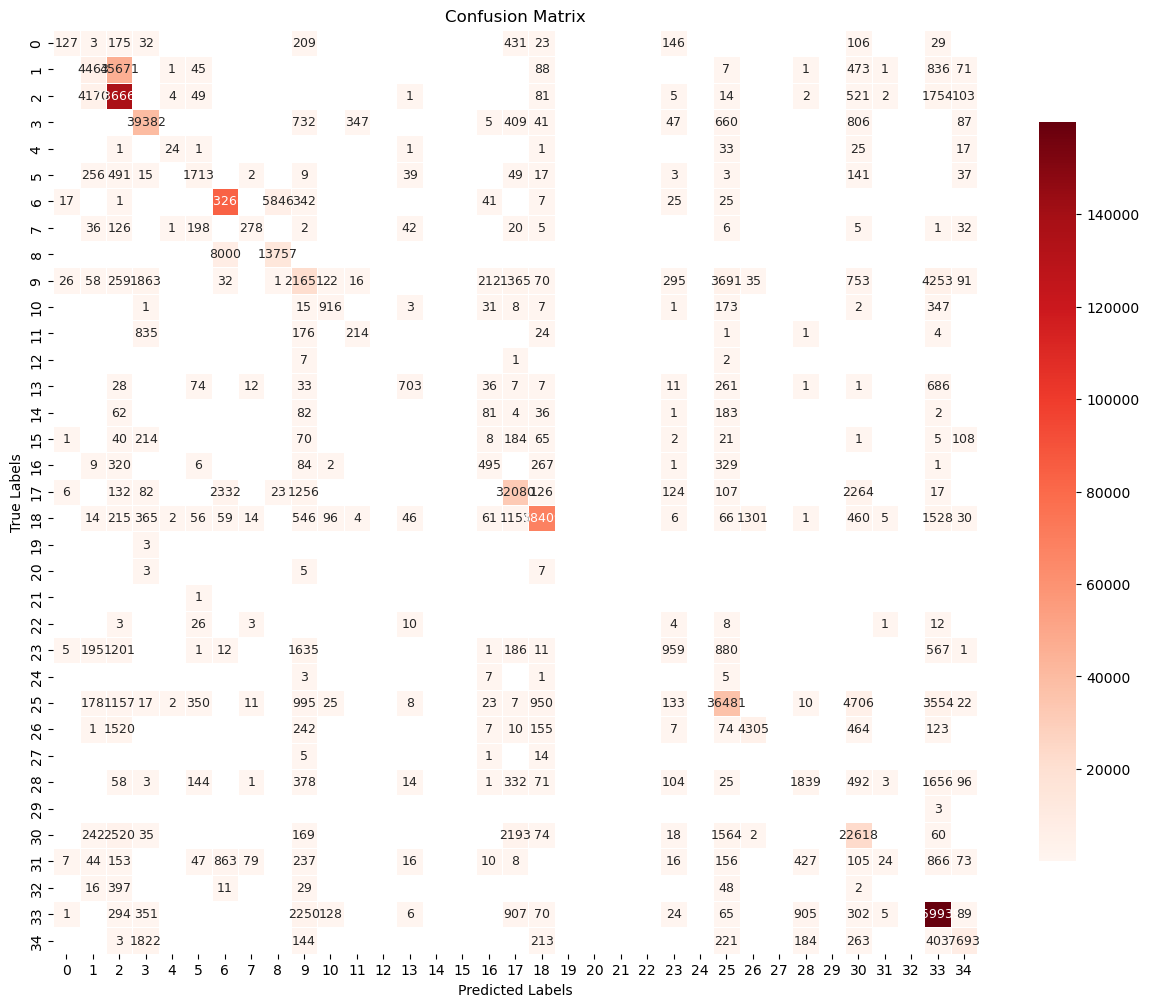

<Figure size 640x480 with 0 Axes>

In [26]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

mask = cm == 0
# Display the confusion matrix using a heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', linewidths=.5, square=True, annot_kws={"size": 9}, mask = mask,cbar_kws={"shrink": 0.8})
#sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=2, square=False, annot_kws={"size": 10}, cbar_kws={"shrink": 0.6},mask =mask)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
plt.savefig('confusion_matrix.png')

### 1. Aritifical Neural Network (ANN) - Hyper Parameter Model

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
data_selected = pd.read_csv('/Users/sarahsha/Downloads/preprocessed_crimes_data.csv')

In [3]:
# Renaming the 'Primary Type' column to 'Crime_Type'
data_selected.rename(columns={'Primary Type': 'Crime_Type'},inplace = True)

In [5]:
data_selected

,Date,Year,Longitude,Latitude,Location Description,Crime_Type,Description
0,653292,2015.0,-87.671447,41.842264,23,9,232
1,3188902,2018.0,-87.671447,41.842264,17,9,231
2,1048858,2016.0,-87.671447,41.842264,189,9,232
3,3188928,2018.0,-87.671447,41.842264,160,26,470
4,1338751,2014.0,-87.671447,41.842264,160,9,232
...,...,...,...,...,...,...,...
7926424,2012451,2020.0,-87.698104,41.772671,17,3,502
7926425,1502240,2020.0,-87.614211,41.724546,160,34,1
7926426,1877568,2020.0,-87.709461,41.870921,17,2,211
7926427,2050563,2020.0,-87.688929,41.995927,189,18,152


In [6]:
# split the data to features and target
X = data_selected.drop('Crime_Type', axis=1)
y = data_selected['Crime_Type']

In [7]:
# scale the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
from sklearn.model_selection import train_test_split
# Split the data into training and temporary (validation and testing) sets.
# X_train, X_temp, y_train, y_temp = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
# Split the remaining data into validation and testing sets.
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42)

In [9]:
from tensorflow.keras.utils import to_categorical
num_classes=len(y_train.unique())
y_train_onehot = to_categorical(y_train, num_classes)
y_val_onehot = to_categorical(y_val, num_classes)
y_test_onehot = to_categorical(y_test, num_classes)

2023-11-24 00:35:51.606231: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [11]:
model = Sequential()
# add hidden layers
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train_onehot, epochs=10, batch_size=64, validation_data=(X_val,y_val_onehot))

2023-11-24 00:35:54.605931: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/10
86696/86696 [==============================] - 89s 1ms/step - loss: 0.4676 - accuracy: 0.8262 - val_loss: 0.4179 - val_accuracy: 0.8565
Epoch 2/10
86696/86696 [==============================] - 89s 1ms/step - loss: 0.3078 - accuracy: 0.8746 - val_loss: 0.3175 - val_accuracy: 0.8746
Epoch 3/10
86696/86696 [==============================] - 89s 1ms/step - loss: 0.2589 - accuracy: 0.8922 - val_loss: 0.2505 - val_accuracy: 0.8914
Epoch 4/10
86696/86696 [==============================] - 89s 1ms/step - loss: 0.2330 - accuracy: 0.9017 - val_loss: 0.2526 - val_accuracy: 0.8940
Epoch 5/10
86696/86696 [==============================] - 87s 1ms/step - loss: 0.2147 - accuracy: 0.9084 - val_loss: 0.2307 - val_accuracy: 0.8983
Epoch 6/10
86696/86696 [==============================] - 88s 1ms/step - loss: 0.2040 - accuracy: 0.9119 - val_loss: 0.1914 - val_accuracy: 0.9144
Epoch 7/10
86696/86696 [==============================] - 89s 1ms/step - loss: 0.1961 - accuracy: 0.9146 - val_loss: 0

In [12]:
loss, accuracy = model.evaluate(X_test, y_test_onehot)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

24523/24523 [==============================] - 12s 481us/step - loss: 0.1781 - accuracy: 0.9201
Test Accuracy: 92.01%


In [17]:
y_pred_probabilities = model.predict(X_test)

24523/24523 [==============================] - 11s 445us/step


In [18]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = np.argmax(y_pred_probabilities,axis=-1)
report = classification_report(y_test, y_pred)
print(f'One Hidden Layer Classification Report:\n'
      f'{report}')

/Users/sarahsha/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sarahsha/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


One Hidden Layer Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.83      0.90      1281
           1       0.56      0.36      0.44     51657
           2       0.78      0.90      0.84    143368
           3       0.99      1.00      0.99     42516
           4       0.87      0.26      0.40       103
           5       0.72      0.56      0.63      2775
           6       0.97      1.00      0.99     89570
           7       0.58      0.55      0.57       752
           8       0.99      0.90      0.94     21757
           9       0.99      0.98      0.98     34693
          11       1.00      0.92      0.96      1504
          12       0.98      1.00      0.99      1255
          13       0.00      0.00      0.00        10
          14       0.91      0.78      0.84      1860
          15       0.75      0.97      0.84       451
          16       0.69      0.74      0.71       719
          17       0.92      0.84      0.

/Users/sarahsha/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


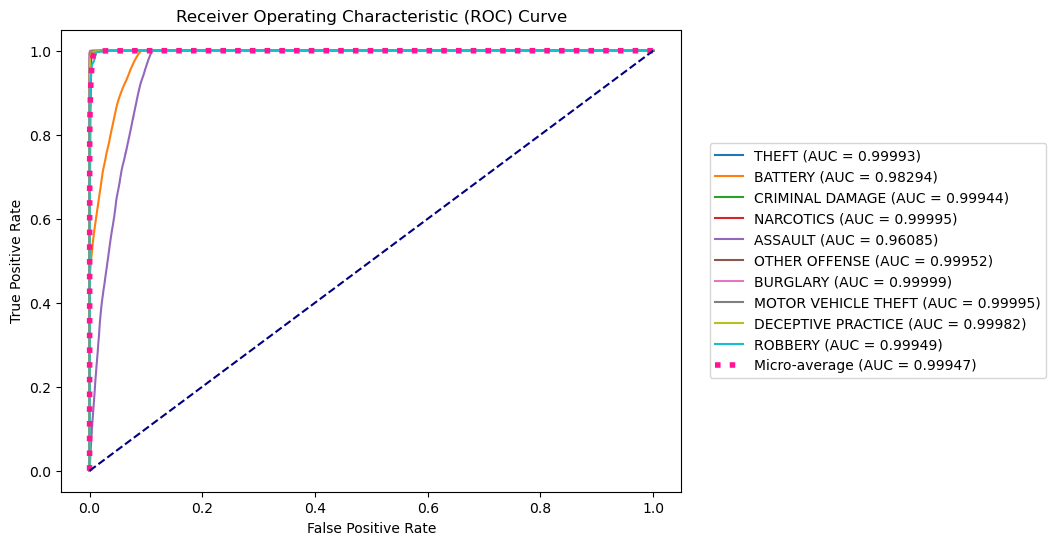

In [24]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import numpy as np


n_classes = y_test_onehot.shape[1] if len(y_test_onehot.shape) > 1 else 1

class_counts = np.sum(y_test_onehot, axis=0)
top_10_classes = np.argsort(class_counts)[-10:][::-1]
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    if i != 10:
        fpr[i], tpr[i], _ = roc_curve(y_test_onehot[:, i], y_test_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_onehot.ravel(),  y_test_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve
plt.figure(figsize=(8, 6))

# Plot individual class ROC curves
for i in top_10_classes:
        plt.plot(fpr[i], tpr[i], label=f'{crime_type_mapping[i]} (AUC = {roc_auc[i]:.5f})')

# Plot micro-average ROC curve
plt.plot(fpr["micro"], tpr["micro"],
         label='Micro-average (AUC = {0:0.5f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

# Plot random guessing
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='right', bbox_to_anchor=(1.6, 0.5))
plt.show()

# Calculate the overall ROC AUC score
#macro_roc_auc = roc_auc_score(y_test_onehot, y_test_pred, average='macro')
#print(f'Macro-average ROC AUC: {macro_roc_auc:.2f}')

### 2. XGBoost - Baseline

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, recall_score
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from sklearn.model_selection import GridSearchCV

In [2]:
# Load the preprocessed dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/preprocessed_crimes_data.csv')

In [3]:
data.isnull()

,Date,Year,Longitude,Latitude,Location Description,Primary Type,Description
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
7916510,False,False,False,False,False,False,False
7916511,False,False,False,False,False,False,False
7916512,False,False,False,False,False,False,False
7916513,False,False,False,False,False,False,False


In [4]:
# Separate features and target variable
X = data.drop('Primary Type', axis=1)
y = data['Primary Type']

In [5]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42)

# Verify the unique classes in the new sets
unique_classes_train = set(y_train)
unique_classes_val = set(y_val)

print(f'Unique classes in train set: {unique_classes_train}')
print(f'Unique classes in validation set: {unique_classes_val}')

Unique classes in train set: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35}
Unique classes in validation set: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35}


In [6]:
# Initialize XGBoost classifier
model = XGBClassifier(
    objective='multi:softmax',
    eval_metric='mlogloss',
    n_estimators=75,
    max_depth=6,
    learning_rate=0.1,
    n_jobs=-1
)

In [7]:
#Train the model
model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_val, y_val)], verbose=True)

[0]	validation_0-mlogloss:2.17887	validation_1-mlogloss:2.17893
[1]	validation_0-mlogloss:1.84210	validation_1-mlogloss:1.84257
[2]	validation_0-mlogloss:1.61944	validation_1-mlogloss:1.61991
[3]	validation_0-mlogloss:1.44736	validation_1-mlogloss:1.44787
[4]	validation_0-mlogloss:1.30910	validation_1-mlogloss:1.30963
[5]	validation_0-mlogloss:1.19267	validation_1-mlogloss:1.19321
[6]	validation_0-mlogloss:1.09379	validation_1-mlogloss:1.09435
[7]	validation_0-mlogloss:1.00738	validation_1-mlogloss:1.00797
[8]	validation_0-mlogloss:0.93221	validation_1-mlogloss:0.93282
[9]	validation_0-mlogloss:0.86644	validation_1-mlogloss:0.86706
[10]	validation_0-mlogloss:0.80787	validation_1-mlogloss:0.80850
[11]	validation_0-mlogloss:0.75607	validation_1-mlogloss:0.75671
[12]	validation_0-mlogloss:0.70948	validation_1-mlogloss:0.71012
[13]	validation_0-mlogloss:0.66763	validation_1-mlogloss:0.66829
[14]	validation_0-mlogloss:0.62999	validation_1-mlogloss:0.63066
[15]	validation_0-mlogloss:0.59619	

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=75,
              n_jobs=-1, num_parallel_tree=None, objective='multi:softmax', ...)

In [8]:
# Evaluate the model on the validation set
y_val_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

Validation Accuracy: 90.90%


In [9]:
# Evaluate the model on the test set
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Test Accuracy: 90.90%


ROC FOR MLOG LOSS

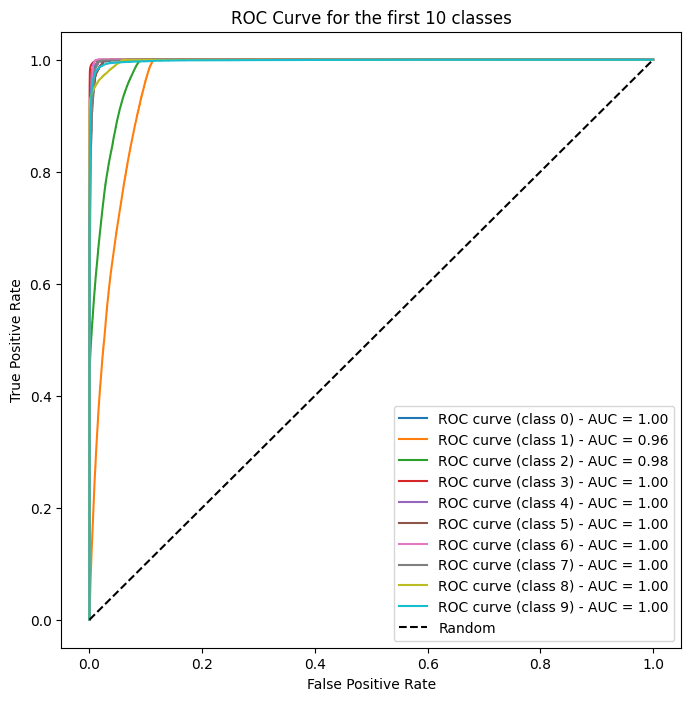

In [10]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_prob = model.predict_proba(X_test)

# Choose the number of classes to display ROC curves for
n_classes = 10

plt.figure(figsize=(8, 8))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test == i, y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'ROC curve (class {i}) - AUC = {roc_auc:.2f}')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for the first {n_classes} classes')
plt.legend(loc='best')
plt.show()




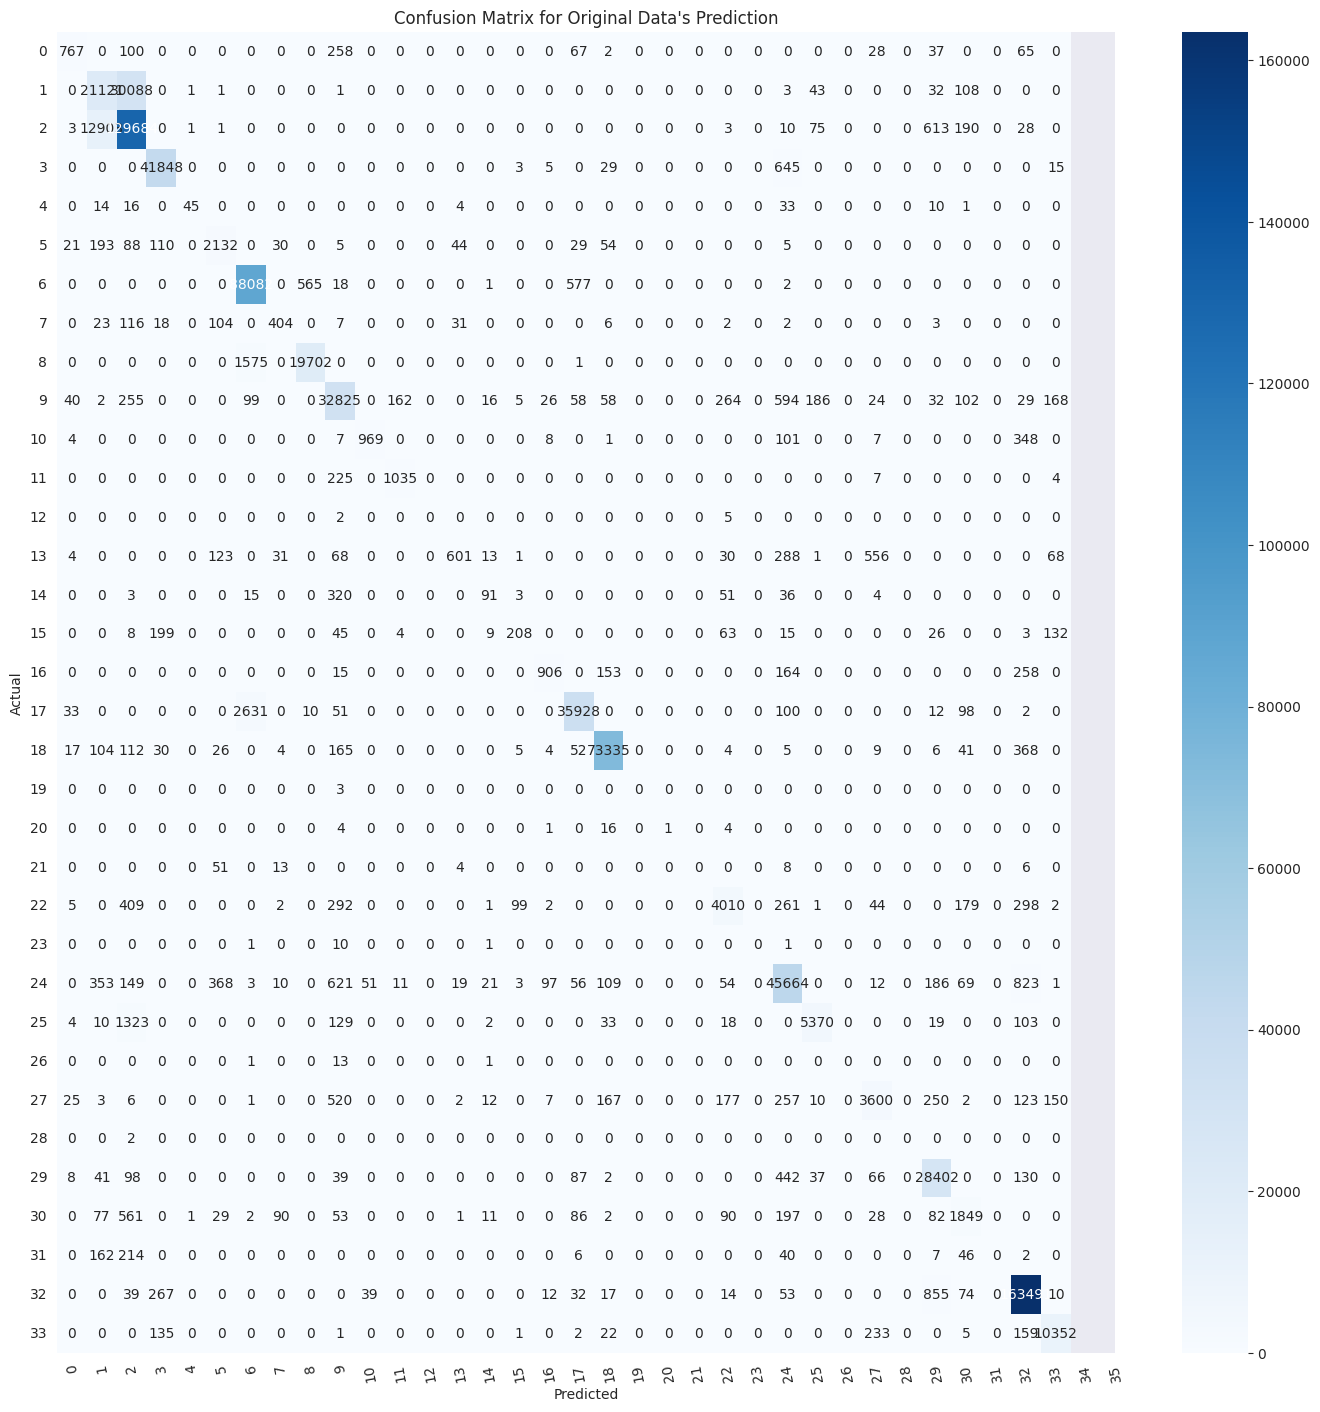

In [11]:
#test confusion matrix

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Set background style for the plot
sns.set_style("dark")  # Change the style here

# Plot confusion matrix as a heatmap
plt.figure(figsize=(14, 14))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=unique_classes_train)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation=100)  # Rotate x labels for better readability
plt.yticks(rotation=0)   # Keep y labels horizontal for better readability
plt.tight_layout()
plt.title('Confusion Matrix for Original Data\'s Prediction')
plt.show()

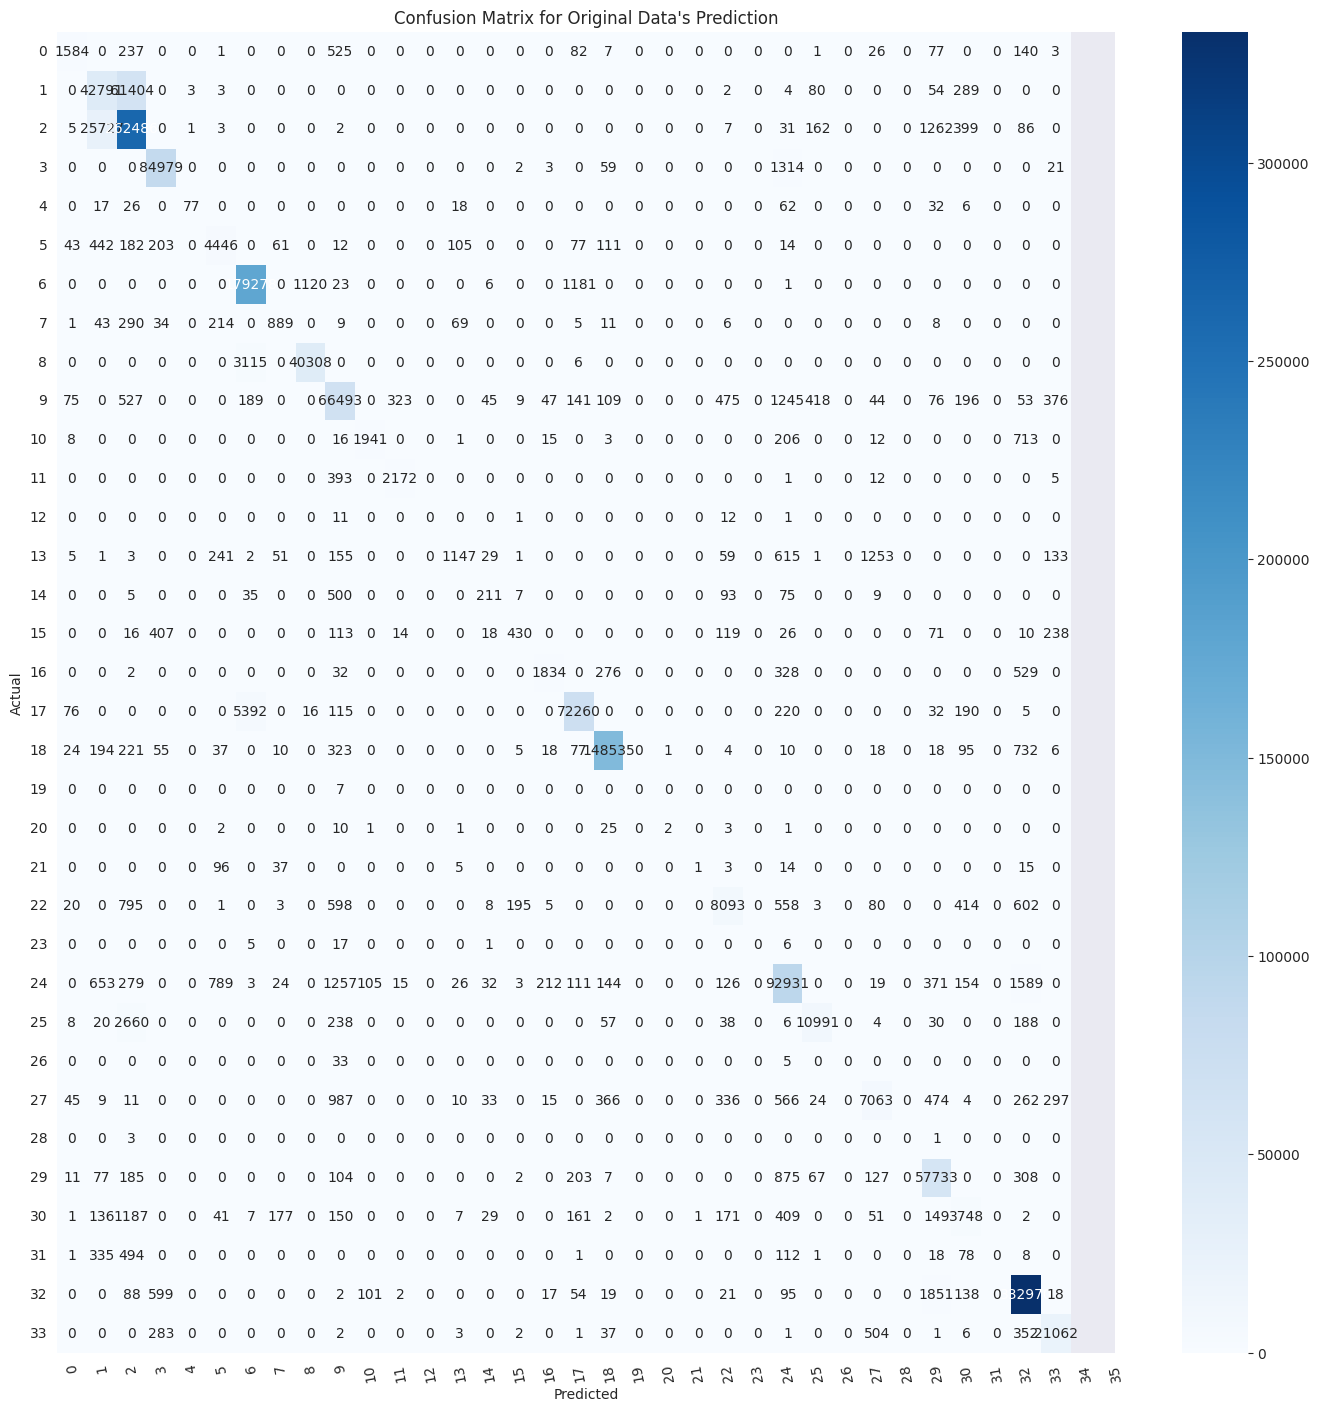

In [12]:
#validation confusion matrix


import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_matrix = confusion_matrix(y_val, y_val_pred)

# Set background style for the plot
sns.set_style("dark")  # Change the style here

# Plot confusion matrix as a heatmap
plt.figure(figsize=(14, 14))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=unique_classes_train)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation=100)  # Rotate x labels for better readability
plt.yticks(rotation=0)   # Keep y labels horizontal for better readability
plt.tight_layout()
plt.title('Confusion Matrix for Original Data\'s Prediction')
plt.show()

In [13]:
#validation data classification report

from sklearn.metrics import classification_report

# Replace X_val or X_test with the respective validation or test set
y_pred = model.predict(X_val)  # Or X_test for test set

# Generate classification report
class_report = classification_report(y_val, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.59      0.69      2683
           1       0.61      0.41      0.49    104630
           2       0.79      0.90      0.84    290171
           3       0.98      0.98      0.98     86378
           4       0.95      0.32      0.48       238
           5       0.76      0.78      0.77      5696
           6       0.95      0.99      0.97    181609
           7       0.71      0.56      0.63      1579
           8       0.97      0.93      0.95     43429
           9       0.92      0.94      0.93     70841
          11       0.90      0.67      0.77      2915
          12       0.86      0.84      0.85      2583
          13       0.00      0.00      0.00        25
          14       0.82      0.31      0.45      3696
          15       0.51      0.23      0.31       935
          16       0.65      0.29      0.41      1462
          17       0.85      0.61      0.71      3001
    

In [14]:
#test data classification report

from sklearn.metrics import classification_report

# Replace X_val or X_test with the respective validation or test set
y_pred = model.predict(X_test)  # Or X_test for test set

# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.58      0.68      1324
           1       0.60      0.41      0.49     51398
           2       0.79      0.90      0.85    143511
           3       0.98      0.98      0.98     42545
           4       0.94      0.37      0.53       123
           5       0.75      0.79      0.77      2711
           6       0.95      0.99      0.97     89245
           7       0.69      0.56      0.62       716
           8       0.97      0.93      0.95     21278
           9       0.92      0.94      0.93     34945
          11       0.92      0.67      0.77      1445
          12       0.85      0.81      0.83      1271
          13       0.00      0.00      0.00         7
          14       0.85      0.34      0.48      1784
          15       0.51      0.17      0.26       523
          16       0.63      0.29      0.40       712
          17       0.85      0.61      0.71      1496
    

### 2. XGBoost - Hyper Parameter Tuned


In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 125],  # Fixed value for number of estimators
    'learning_rate': [0.01] ,  # Fixed value for learning rate
}

# Initialize XGBoost classifier
model = XGBClassifier(objective='multi:softmax', eval_metric='mlogloss', n_jobs=-1)

# Initialize StratifiedKFold
stratified_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Initialize GridSearchCV with StratifiedKFold
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           scoring='accuracy', cv=stratified_cv)


In [16]:
# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

# Display the best parameters and corresponding accuracy
print(f'Best Parameters: {grid_search.best_params_}')

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Make predictions on the validation set with the best model
y_val_pred = best_model.predict(X_val)
accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy with Best Model: {accuracy * 100:.2f}%')

# Make predictions on the test set with the best model
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy with Best Model: {test_accuracy * 100:.2f}%')

# Display the classification report for the test set
report = classification_report(y_test, y_test_pred)
print(f'{report}')

Best Parameters: {'learning_rate': 0.01, 'n_estimators': 100}
Validation Accuracy with Best Model: 90.15%
Test Accuracy with Best Model: 90.18%
              precision    recall  f1-score   support

           0       0.84      0.47      0.60      1324
           1       0.61      0.32      0.42     51398
           2       0.77      0.93      0.84    143511
           3       0.98      0.98      0.98     42545
           4       0.94      0.37      0.53       123
           5       0.74      0.77      0.75      2711
           6       0.95      0.99      0.97     89245
           7       0.73      0.53      0.61       716
           8       0.97      0.93      0.95     21278
           9       0.89      0.94      0.91     34945
          11       0.89      0.62      0.73      1445
          12       0.90      0.48      0.63      1271
          13       0.00      0.00      0.00         7
          14       0.88      0.32      0.47      1784
          15       0.62      0.09      0.16  

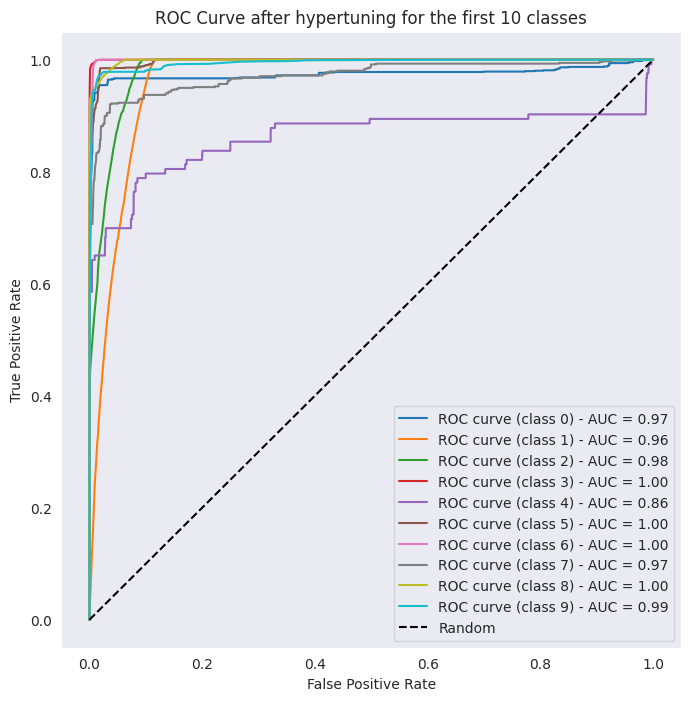

In [18]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_prob = best_model.predict_proba(X_test)

# Choose the number of classes to display ROC curves for
n_classes = 10

plt.figure(figsize=(8, 8))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test == i, y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'ROC curve (class {i}) - AUC = {roc_auc:.2f}')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve after hypertuning for the first {n_classes} classes')
plt.legend(loc='best')
plt.show()






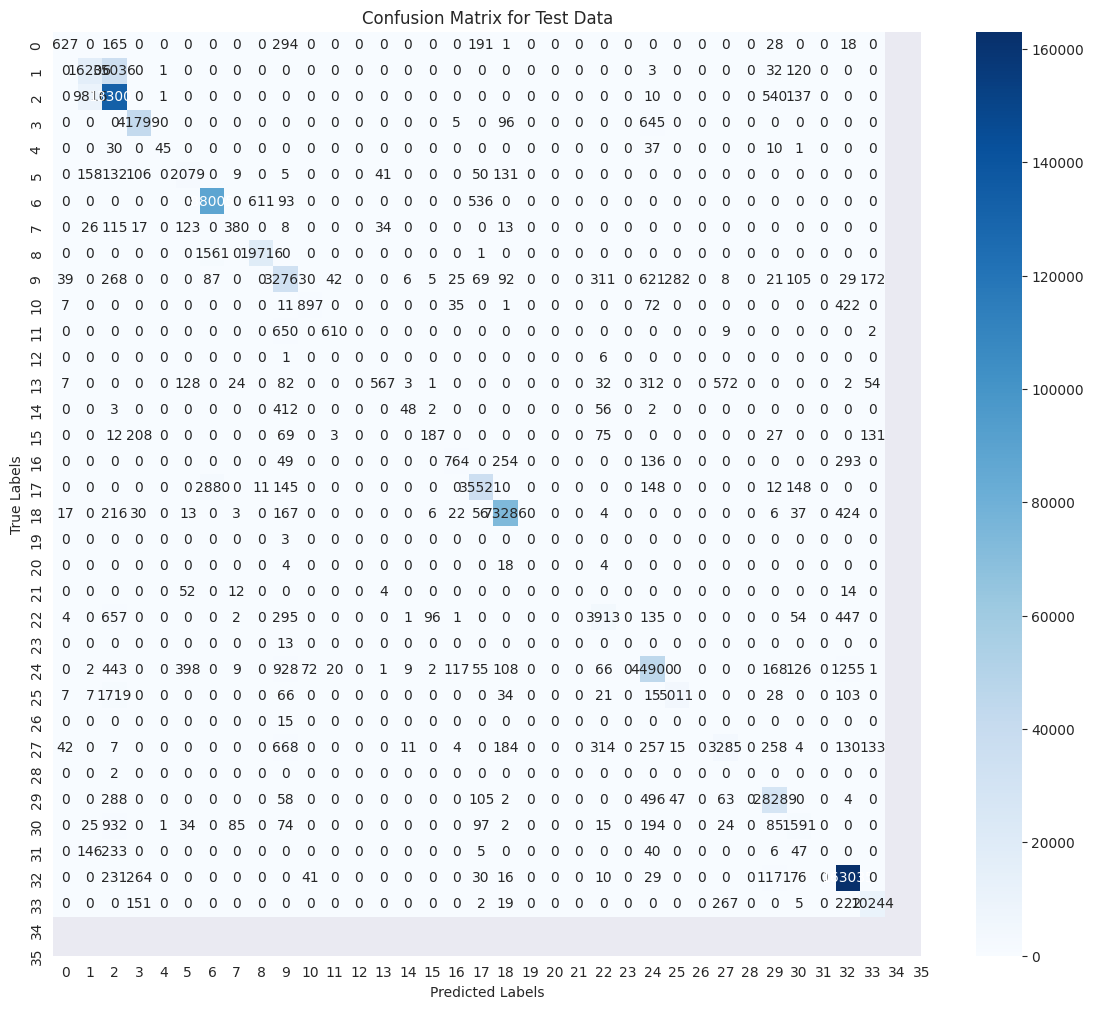

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming best_model is your XGBoost model obtained after GridSearchCV and X_test, y_test are your test data
#y_test_pred = best_model.predict(X_test)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Test Data')
plt.show()


### 3. Random Forest- Baseline

In [ ]:
import numpy as np
import pandas as pd
import re
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    f1_score, hinge_loss, precision_score, recall_score )
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [ ]:
# Load the preprocessed_crimes_data.csv file
data_selected = pd.read_csv('preprocessed_crimes_data.csv')

data_selected.head(10)

,Date,Year,Longitude,Latitude,Location Description,Primary Type,Description
0,653292,2015.0,-87.671447,41.842264,23.0,9.0,232.0
1,3188902,2018.0,-87.671447,41.842264,17.0,9.0,231.0
2,1048858,2016.0,-87.671447,41.842264,189.0,9.0,232.0
3,3188928,2018.0,-87.671447,41.842264,160.0,26.0,470.0
4,1338751,2014.0,-87.671447,41.842264,160.0,9.0,232.0
5,2223711,2018.0,-87.671447,41.842264,160.0,34.0,360.0
6,7618,2018.0,-87.671447,41.842264,160.0,9.0,232.0
7,778818,2018.0,-87.671447,41.842264,160.0,9.0,232.0
8,276626,2015.0,-87.671447,41.842264,140.0,9.0,232.0
9,1084232,2012.0,-87.671447,41.842264,189.0,9.0,232.0


In [ ]:
# Renaming the 'Primary Type' column to 'Crime_Type'
data_selected.rename(columns={'Primary Type': 'Crime_Type'}, inplace=True)

data_selected.head(10)

,Date,Year,Longitude,Latitude,Location Description,Crime_Type,Description
0,653292,2015.0,-87.671447,41.842264,23.0,9.0,232.0
1,3188902,2018.0,-87.671447,41.842264,17.0,9.0,231.0
2,1048858,2016.0,-87.671447,41.842264,189.0,9.0,232.0
3,3188928,2018.0,-87.671447,41.842264,160.0,26.0,470.0
4,1338751,2014.0,-87.671447,41.842264,160.0,9.0,232.0
5,2223711,2018.0,-87.671447,41.842264,160.0,34.0,360.0
6,7618,2018.0,-87.671447,41.842264,160.0,9.0,232.0
7,778818,2018.0,-87.671447,41.842264,160.0,9.0,232.0
8,276626,2015.0,-87.671447,41.842264,140.0,9.0,232.0
9,1084232,2012.0,-87.671447,41.842264,189.0,9.0,232.0


In [ ]:
# Checking for missing values after imputing
print("Missing values:\n", data_selected.isnull().sum())


Missing values:
 Date                    0
Year                    0
Longitude               0
Latitude                1
Location Description    1
Crime_Type              1
Description             1
dtype: int64


In [ ]:
# Assuming df is your DataFrame
data_selected.dropna(inplace=True)  # Drops rows with missing values

In [ ]:
# Split the dataset into features and tagert
X = data_selected.drop('Crime_Type', axis=1)
y = data_selected['Crime_Type']

# Split the data into training and temporary (validation and testing) sets.
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
# Split the remaining data into validation and testing sets.
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42)


In [ ]:
# Implementing Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=150,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)

# Model Fitting
rf_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=150, random_state=42)

In [ ]:
# Evaluate the model on the validation set
y_val_pred = rf_model.predict(X_val)

# Calculate accuracy on the validation set
accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

# Evaluate the model on the test set
y_test_pred = rf_model.predict(X_test)

# Calculate accuracy on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {accuracy_test * 100:.2f}%')


Validation Accuracy: 75.49%
Test Accuracy: 75.56%


In [ ]:
#validation data classification report
y_pred = rf_model.predict(X_val)

# Generate classification report
class_report = classification_report(y_val, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       307
           1       0.58      0.25      0.35     12807
           2       0.58      0.89      0.70     27876
           3       0.97      0.61      0.75      5944
           4       0.00      0.00      0.00        83
           5       0.00      0.00      0.00       125
           6       0.95      0.98      0.96     17997
           7       0.67      0.00      0.00       892
           8       1.00      0.68      0.81      3203
           9       0.70      0.66      0.68     11185
          11       0.00      0.00      0.00       111
          12       0.00      0.00      0.00        20
          13       0.00      0.00      0.00         7
          14       0.00      0.00      0.00       252
          15       0.00      0.00      0.00       114
          16       0.00      0.00      0.00        88
          17       0.00      0.00      0.00       135
    

In [ ]:
#test data classification report
y_pred = rf_model.predict(X_test)

# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       136
           1       0.58      0.24      0.34      6106
           2       0.58      0.89      0.70     13547
           3       0.97      0.59      0.73      2913
           4       0.00      0.00      0.00        41
           5       0.00      0.00      0.00        66
           6       0.94      0.97      0.96      9104
           7       1.00      0.00      0.01       434
           8       1.00      0.68      0.81      1659
           9       0.69      0.66      0.68      5445
          11       0.00      0.00      0.00        57
          12       0.00      0.00      0.00        14
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00       150
          15       0.00      0.00      0.00        50
          16       0.00      0.00      0.00        50
          17       0.00      0.00      0.00        81
    

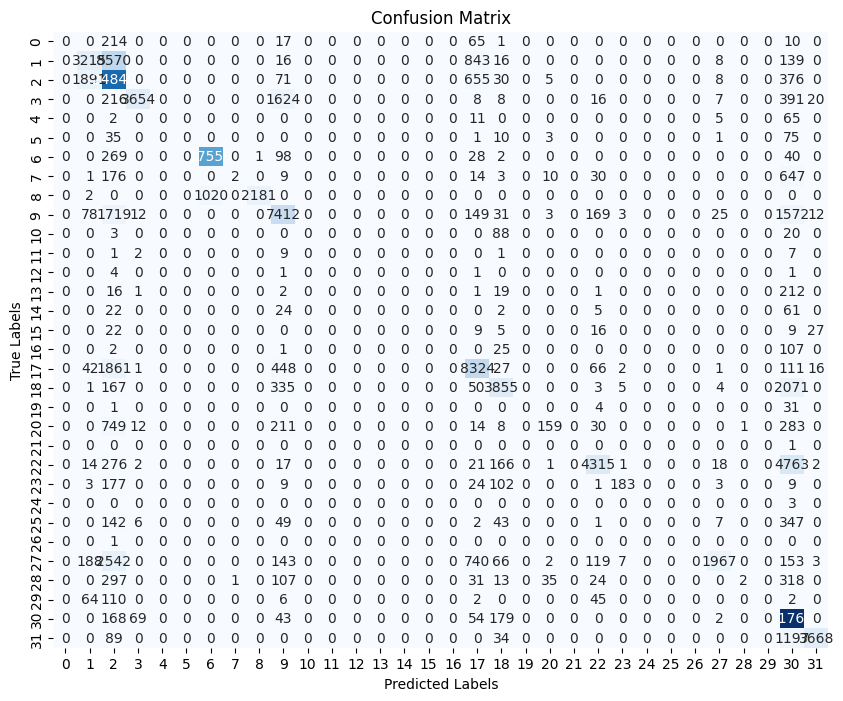

In [ ]:
#confusion matrix for validation set
y_pred = rf_model.predict(X_val)

# Computing confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)

# Displaying confusion matrix with heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


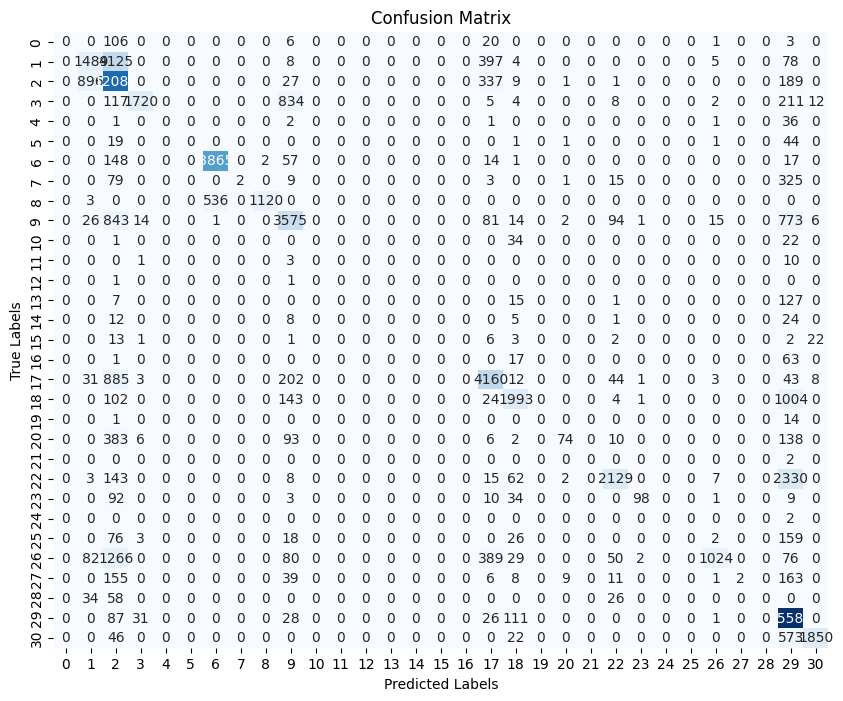

In [ ]:
#confusion matrix for test set
y_pred = rf_model.predict(X_test)

# Computing confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Displaying confusion matrix with heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

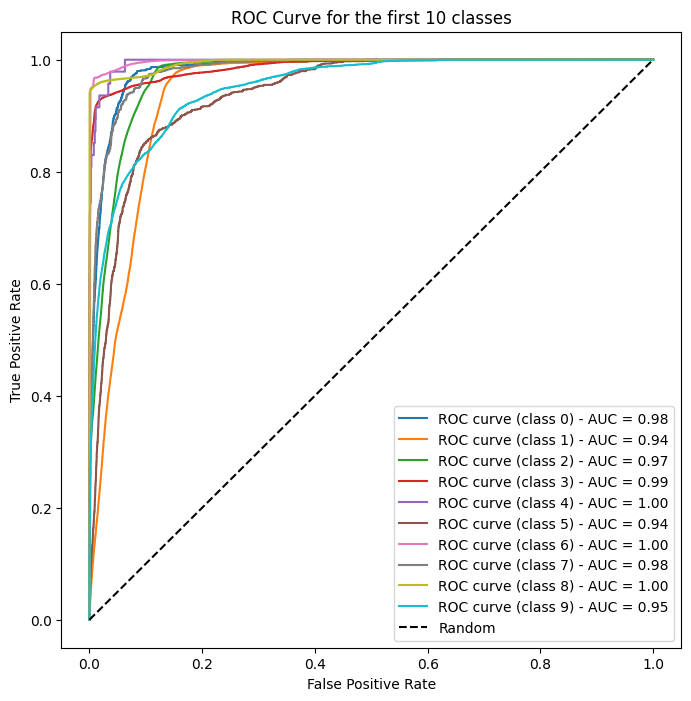

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_prob = rf_model.predict_proba(X_test)

# Choose the number of classes to display ROC curves for
n_classes = 10

plt.figure(figsize=(8, 8))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test == i, y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'ROC curve (class {i}) - AUC = {roc_auc:.2f}')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for the first {n_classes} classes before tuning')
plt.legend(loc='best')
plt.show()


In [ ]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

param_dist = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=5,  # Adjust the number of iterations as needed
    cv=StratifiedKFold(n_splits=5),
    scoring='accuracy',
    random_state=42
)

random_search.fit(X_train, y_train)

best_params_random = random_search.best_params_
best_rf_model_random = random_search.best_estimator_

print("Best Hyperparameters (Random Search) for Random Forest:", best_params_random)


Best Hyperparameters (Random Search) for Random Forest: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}


### 3. Random Forest - Hyper Parameter Model

In [ ]:
# Implementing Random Forest model with best parameters
rf_model_tuned = RandomForestClassifier(
    n_estimators=50,
    min_samples_split=2,
    min_samples_leaf=1,
    max_depth=None
)

# Model Fitting
rf_model_tuned.fit(X_train, y_train)


RandomForestClassifier(n_estimators=50)

In [ ]:
# Evaluate the model on the validation set
y_val_pred = rf_model_tuned.predict(X_val)

# Calculate accuracy on the validation set
accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

# Evaluate the model on the test set
y_test_pred = rf_model_tuned.predict(X_test)

# Calculate accuracy on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {accuracy_test * 100:.2f}%')


Validation Accuracy: 90.73%
Test Accuracy: 90.86%


In [ ]:
#validation data classification report
y_pred = rf_model_tuned.predict(X_val)

# Generate classification report
class_report = classification_report(y_val, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.65      0.75       307
           1       0.60      0.61      0.60     12807
           2       0.81      0.82      0.81     27876
           3       0.98      0.97      0.98      5944
           4       0.87      0.41      0.56        83
           5       0.55      0.18      0.27       125
           6       0.98      1.00      0.99     17997
           7       0.85      0.67      0.75       892
           8       1.00      0.90      0.94      3203
           9       0.95      0.97      0.96     11185
          11       0.86      0.76      0.80       111
          12       0.88      0.35      0.50        20
          13       0.00      0.00      0.00         7
          14       0.80      0.44      0.56       252
          15       0.90      0.31      0.46       114
          16       0.83      0.22      0.34        88
          17       0.90      0.61      0.73       135
    

In [ ]:
#test data classification report
y_pred = rf_model_tuned.predict(X_test)

# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.53      0.65       136
           1       0.59      0.61      0.60      6106
           2       0.81      0.82      0.81     13547
           3       0.98      0.98      0.98      2913
           4       0.88      0.68      0.77        41
           5       0.50      0.24      0.33        66
           6       0.98      1.00      0.99      9104
           7       0.85      0.70      0.77       434
           8       1.00      0.91      0.95      1659
           9       0.95      0.97      0.96      5445
          11       0.92      0.63      0.75        57
          12       1.00      0.43      0.60        14
          13       0.00      0.00      0.00         2
          14       0.89      0.34      0.49       150
          15       0.79      0.30      0.43        50
          16       0.67      0.04      0.08        50
          17       0.90      0.74      0.81        81
    

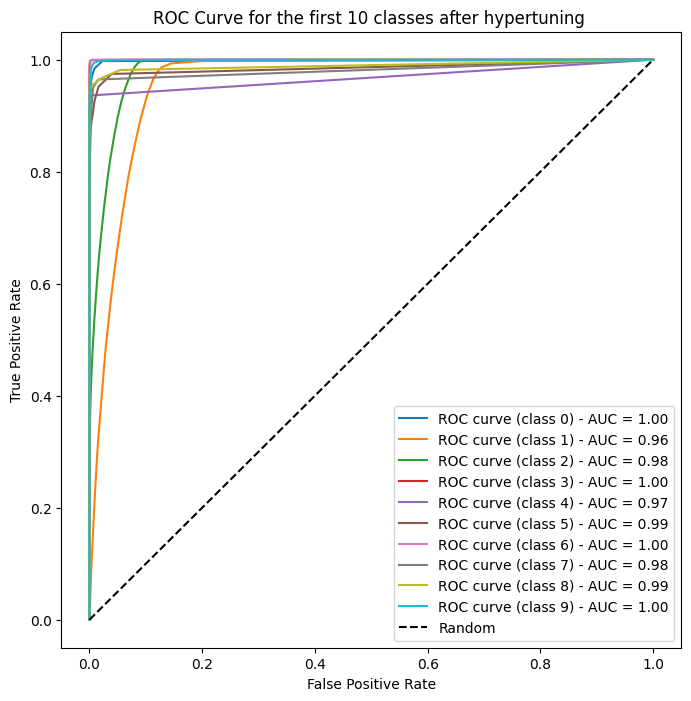

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_prob = rf_model_tuned.predict_proba(X_test)

# Choose the number of classes to display ROC curves for
n_classes = 10

plt.figure(figsize=(8, 8))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test == i, y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'ROC curve (class {i}) - AUC = {roc_auc:.2f}')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for the first {n_classes} classes after hypertuning ')
plt.legend(loc='best')
plt.show()

### 4. Decision Tree

In [ ]:
pip install joblib

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import joblib
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
import time

file_path = 'preprocessed_crimes_data.csv'
df = pd.read_csv(file_path)
df.rename(columns={'Primary Type': 'Crime_Type'}, inplace=True)

print("Missing values:\n", df.isnull().sum())

#columns_to_convert = ['Year', 'Location Description', 'Crime_Type', 'Description']
#df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')
#df[columns_to_convert] = df[columns_to_convert].fillna(0).astype(int)

df.head(5)

Missing values:
 Date                    0
Year                    0
Longitude               0
Latitude                0
Location Description    0
Crime_Type              0
Description             0
dtype: int64


,Date,Year,Longitude,Latitude,Location Description,Crime_Type,Description
0,653295,2015.0,-87.67145,41.842259,23,9,232
1,3184228,2018.0,-87.67145,41.842259,17,9,231
2,1048861,2016.0,-87.67145,41.842259,189,9,232
3,3184254,2018.0,-87.67145,41.842259,160,26,470
4,1338752,2014.0,-87.67145,41.842259,160,9,232


## Common functions for metrics

In [9]:
# precision, recall, and F1 score
def print_metrics(y_test, y_test_pred):
    precision = precision_score(y_test, y_test_pred, average='weighted')  # Use 'weighted' for multiclass
    recall = recall_score(y_test, y_test_pred, average='weighted')
    f1 = f1_score(y_test, y_test_pred, average='weighted')

    print(f'Precision: {precision:.3f}')
    print(f'Recall: {recall:.3f}')
    print(f'F1 Score: {f1:.3f}')

In [10]:
def print_class_report_conf_matrix(y_test, y_test_pred):
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_test_pred)
    #np.set_printoptions(threshold=np.inf)
    print('Confusion Matrix:')
    print(conf_matrix)
    #np.set_printoptions(threshold=1000)

    # Classification Report
    class_report = classification_report(y_test, y_test_pred)
    print('Classification Report:')
    print(class_report)
    
    accuracy = accuracy_score(y_test, y_test_pred)
    print(f'Accuracy Score: {accuracy * 100:.2f}%')
    print_metrics(y_test, y_test_pred)

In [11]:
def show_roc_auc_curve(X_test, y_test, model):
    y_test_bin = label_binarize(y_test, classes=model.classes_)
    n_classes = y_test_bin.shape[1]

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], model.predict_proba(X_test)[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curve
    plt.figure(figsize=(10, 8))

    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Multi-Class')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=5)
    plt.show()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7916515 entries, 0 to 7916514
Data columns (total 7 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Date                  int64  
 1   Year                  float64
 2   Longitude             float64
 3   Latitude              float64
 4   Location Description  int64  
 5   Crime_Type            int64  
 6   Description           int64  
dtypes: float64(3), int64(4)
memory usage: 422.8 MB


## Splitting into training, testing and validation datasets

In [13]:
target_col = 'Crime_Type'
X = df.drop(target_col, axis=1)
y = df[target_col]

# Split the data into training, testing, and validation sets
# 70% training, 20% testing, 10% validation
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42)

print(len(X_train), len(y_train), len(X_test), len(y_test), len(X_val), len(y_val))

5541560 5541560 1591219 1591219 783736 783736


### Baseline Model

In [14]:
start_time = time.time()
classifier = DecisionTreeClassifier()

classifier.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = classifier.predict(X_val)
accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

# Now make predictions on the test set
y_test_pred = classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

end_time = time.time()
print(f"Training time: {end_time - start_time} seconds")

Validation Accuracy: 92.73%
Test Accuracy: 92.77%
Training time: 116.54644131660461 seconds


In [15]:
print_metrics(y_test, y_test_pred)

Precision: 0.928
Recall: 0.928
F1 Score: 0.928


In [16]:
print_class_report_conf_matrix(y_test, y_test_pred)

Confusion Matrix:
[[  2515      0      0 ...     19      0      0]
 [     0  51530  52287 ...    470      0      0]
 [     0  53082 236395 ...    487      0      0]
 ...
 [    15    373    436 ...    202      0      0]
 [     0      0      0 ...      0 335975      0]
 [     0      0      0 ...      0      0  22254]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2683
           1       0.49      0.49      0.49    104630
           2       0.82      0.81      0.82    290171
           3       1.00      1.00      1.00     86378
           4       0.94      0.92      0.93       238
           5       0.88      0.89      0.89      5696
           6       0.98      0.98      0.98    181609
           7       0.80      0.79      0.80      1579
           8       0.93      0.94      0.93     43429
           9       1.00      1.00      1.00     70841
          11       0.99      0.99      0.99      2915
          

C:\Users\abhis\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\abhis\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


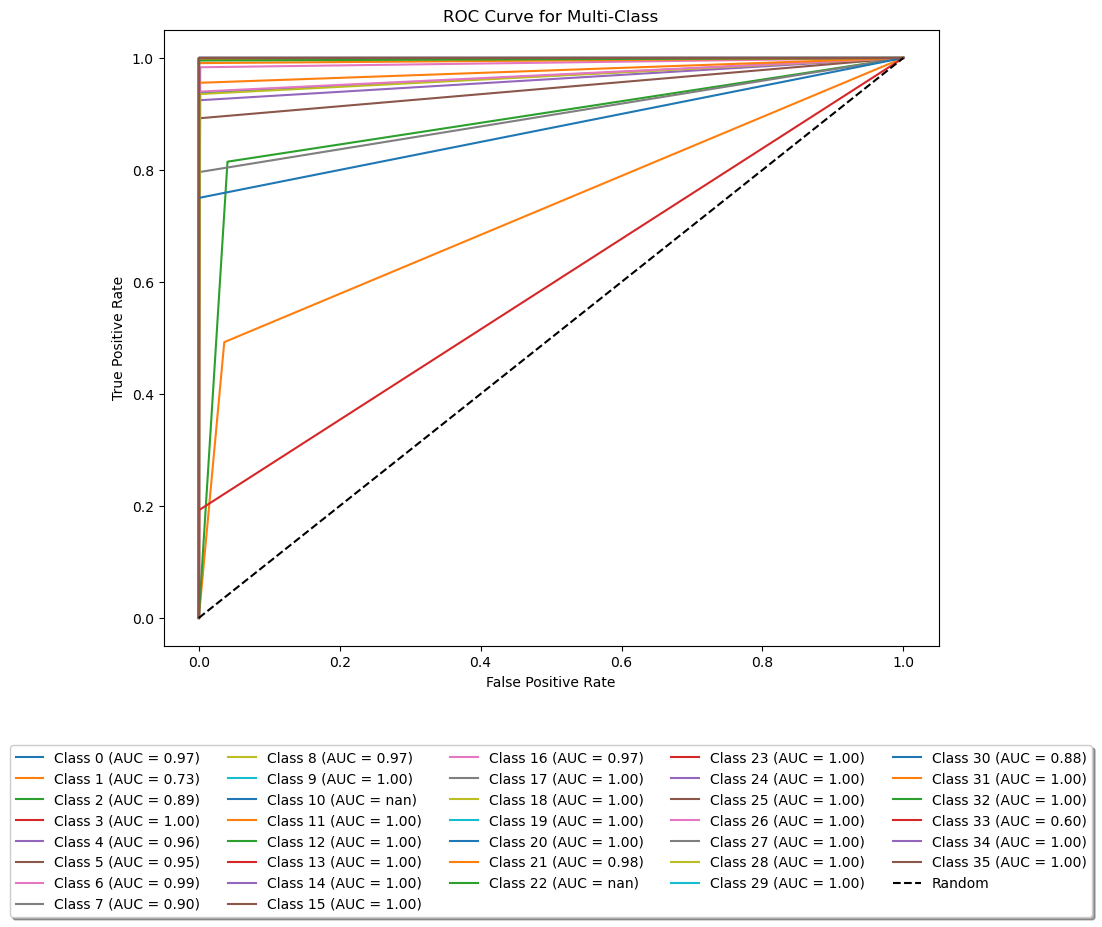

In [17]:
show_roc_auc_curve(X_test, y_test, classifier)

In [5]:
# Save the trained model
model_filename = 'dt_model_baseline.joblib'
joblib.dump(classifier, model_filename)
print(f'Model saved to {model_filename}')

Model saved to dt_model_org_dataset.joblib


## Do GridSearch to find best hyperparameters for decision tree classifier

In [10]:
dtree = DecisionTreeClassifier()

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Use GridSearchCV to do grid search
grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_

accuracy = best_model.score(X_test, y_test)
print("Accuracy on Test Set:", accuracy)

C:\Users\abhis\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 15, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 5}
Accuracy on Test Set: 0.9427904015726308


### Hyperparameter tuned model

In [18]:
start_time = time.time()
best_clssifier = DecisionTreeClassifier(criterion='entropy',
                                        max_depth=15,
                                        max_features=None,
                                        min_samples_leaf=4,
                                        min_samples_split=5)

best_clssifier.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = best_clssifier.predict(X_val)
accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

# Now make predictions on the test set
y_test_pred = best_clssifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

end_time = time.time()
print(f"Training time: {end_time - start_time} seconds")

Validation Accuracy: 94.27%
Test Accuracy: 94.28%
Training time: 148.59780430793762 seconds


In [19]:
print_metrics(y_test, y_test_pred)

Precision: 0.939
Recall: 0.943
F1 Score: 0.940


In [20]:
print_class_report_conf_matrix(y_test, y_test_pred)

Confusion Matrix:
[[  2606      0      0 ...      0      0      0]
 [     0  47723  56904 ...      0      0      0]
 [     0  28907 261261 ...      0      0      0]
 ...
 [    17    380    440 ...    191      0      0]
 [     0      0      0 ...      0 335975      0]
 [     0      0      0 ...      0      0  22254]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      2683
           1       0.62      0.46      0.52    104630
           2       0.82      0.90      0.86    290171
           3       1.00      1.00      1.00     86378
           4       0.97      0.96      0.96       238
           5       0.95      0.92      0.93      5696
           6       0.98      1.00      0.99    181609
           7       0.96      0.74      0.84      1579
           8       1.00      0.93      0.96     43429
           9       1.00      1.00      1.00     70841
          11       0.99      0.99      0.99      2915
          

C:\Users\abhis\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\abhis\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


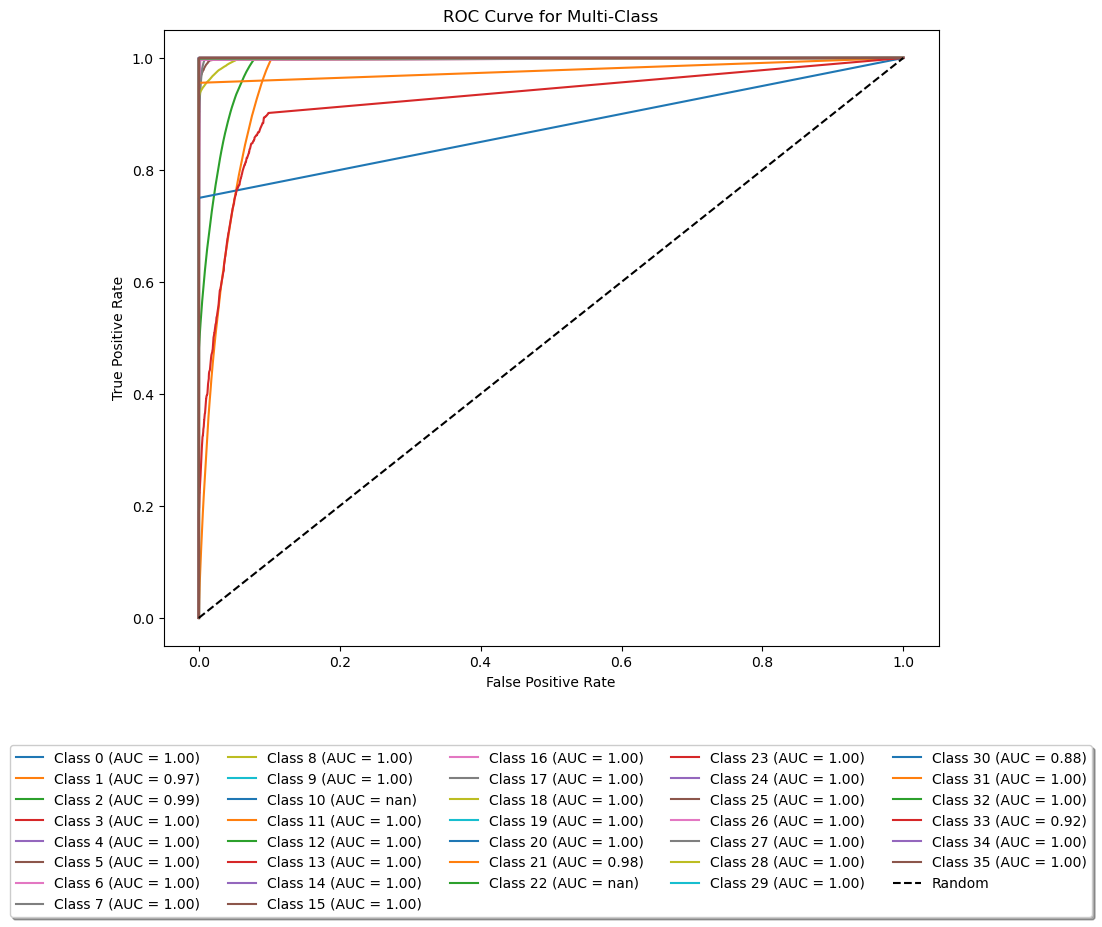

In [21]:
show_roc_auc_curve(X_test, y_test, best_clssifier)

### Saving the model

In [9]:
# Save the trained model
model_filename = 'dt_hyperparameter_tuning_model.joblib'
joblib.dump(best_clssifier, model_filename)
print(f'Model saved to {model_filename}')

Model saved to dt_hyperparameter_tuning_model.joblib
